# **Pytorch 기초**

- Tensor 기초 (산술, view, squeeze, cat, Class)

## Tensor 기초

In [ ]:
import torch

In [ ]:
tensor = torch.FloatTensor([0.,1.,2.,3.,4.,5.,6.]);print(tensor)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [ ]:
print(tensor.dim())
print(tensor.shape)

1
torch.Size([7])


In [ ]:
tensor[3:]

tensor([3., 4., 5., 6.])

In [ ]:
tensor = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])

In [ ]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])

In [ ]:
m3 = torch.FloatTensor([3])

In [ ]:
m1+m3 # tensor는 행렬 개수가 달라도 알아서 계산해주긴 하지만 주의 요망  

tensor([[6., 6.]])

In [ ]:
# element-wise 곱셈 (동일한 크기의 행렬 동일한 위치 원소끼리 곱셈)
# 예시: 다른 크기 행렬 Tensor로 자동 세팅되어 element-wise 곱셈
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])

In [ ]:
print(m1.shape)
print(m2.shape)

torch.Size([2, 2])
torch.Size([2, 1])


In [ ]:
m1*m2 # = m1.mul(m2)

tensor([[1., 2.],
        [6., 8.]])

In [ ]:
# Tensor 평균
tensor = torch.FloatTensor([1,2])
tensor.mean()

tensor(1.5000)

In [ ]:
tensor = torch.FloatTensor([[1,2], 
                            [3,4]])
print(tensor.mean())
print(tensor.mean(dim=0)) # 차원별로 계산 (0 = 열만, 1 = 행만). 나머지 차원 배제

tensor(2.5000)
tensor([2., 3.])


In [ ]:
# Tensor 차원변환 (축소)
import numpy as np
tensor = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(tensor) # 3차원 텐서
ft.shape

torch.Size([2, 2, 3])

In [ ]:
print(ft.view([-1,3])) # 3차원 텐서 2차원으로 변환, -1: 알아서 변환
print(ft.view([-1,3]).shape) # 4 * 3 행렬 (2차원 텐서)로 자동 변환

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [ ]:
# 텐서 변환 (차원 유지한 상태에서 크기 변경)
print(ft.view([-1,1,3]))
print(ft.view([-1,1,3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


In [ ]:
# Squeeze ('1'인 차원 제거)
ft = torch.FloatTensor([[0],[1],[2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.squeeze())
print(ft.squeeze().shape)

# 3 * 1 이었던 Tensor에서, squeeze를 통해 열(2차원)을 제거하고 1차원 행렬(3, )로 변환

tensor([0., 1., 2.])
torch.Size([3])


In [ ]:
# Unsqueeze (특정 위치에 1인 차원 추가)
ft = torch.Tensor([0,1,2]);print(ft.shape)

torch.Size([3])


In [ ]:
print(ft.unsqueeze(0)) # = ft.view(1,-1)
print(ft.unsqueeze(0).shape) # = ft.view(1,-1).shape

# (3, )이었던 1차원 텐서에서 unsqueeze(0)를 통해 행에 1을 추가하여 2차원 행렬(1, 3)로 변환

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

# (3, )이었던 1차원 텐서에서 unsqueeze(1)를 통해 열에 1을 추가하여 2차원 행렬로 (3, 1)로 변환

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
tf = torch.LongTensor([1,2,3,4]) # Long Type
tf

tensor([1, 2, 3, 4])

In [ ]:
tf.float()

tensor([1., 2., 3., 4.])

In [ ]:
bt = torch.ByteTensor([True,False,False,True]);bt # Byte Type

tensor([1, 0, 0, 1], dtype=torch.uint8)

In [ ]:
# Tensor 연결_concatenate
x = torch.FloatTensor([[1,2], [3,4]])
y = torch.FloatTensor([[5,6], [7,8]])

cat_1 = torch.cat([x,y], dim = 0) # torch.cat: 어떤 차원 늘릴지 결정 (dim 통해서)
print(cat_1)
cat_2 = torch.cat([x,y], dim = 1)
print(cat_2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


In [ ]:
# Tensor 연결_stacking - 많은 연산 포함하고 있어서 이게 유리할수도 있음
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x,y,z])) # = torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0)
print(torch.stack([x,y,z], dim=1))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [ ]:
# ones_like, zeros_like
x = torch.FloatTensor([[0,1,2], [2,1,0]])

print(torch.ones_like(x)) # x의 형태와 똑같지만, 전부 1로 채워진 tensor 생성

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
# 덮어쓰기 연산 (Inplace Operation)
x = torch.FloatTensor([[1,2], [3,4]])

print(x.mul(2.))
print(x)

print(x.mul_(2.)) # mul_ 로 하면 값 덮어씀
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


In [ ]:
# function(def) vs Class
result = 0

In [ ]:
def add(num):
  global result # result 값 갱신해줌 (위에 result=0으로 선언했지만 여기에서 바꿔줌)
  result += num
  return result

In [ ]:
print(add(3))
print(add(4)) # 위에서 add(3)을 통해 result 값이 3으로 바뀌었기 때문

3
7


In [ ]:
# 함수로 두 개의 덧셈기 구현
result_1 = 0
result_2 = 0

def add_1(num):
  global result_1
  result_1 += num
  return result_1

def add_2(num):
  global result_2
  result_2 += num
  return result_2


print(add_1(3))
print(add_1(4))
print(add_2(6))
print(add_2(9))

3
7
6
15


In [ ]:
# Class로 덧셈기 구현
class Calculator:
  def __init__(self): # 객체 생성 시, 호출 때 실행되는 초기화 함수 (생성자)
    self.result = 0

  def add(self, num): # 객체 생성 후 사용할 수 있는 함수
    self.result += num
    return self.result

In [ ]:
cal1 = Calculator() # Class 불러오기
cal2 = Calculator()

In [ ]:
print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(6))
print(cal2.add(9))

3
7
6
15


## Linear Regression By Pytorch
- 단순회귀 (torch, Class)
- 다중회귀 (torch, Class)

In [ ]:
# 훈련 데이터 세팅
x_train = torch.FloatTensor([[1],[2],[3]]) # 3 * 1 2차원 텐서
y_train = torch.FloatTensor([[2],[4],[6]]) # 3 * 1 2차원 텐서

In [ ]:
# 경사하강법 (Optimizer Algorism)
# https://wikidocs.net/53560 3-1 참고
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1) # 랜덤 시드 픽스


In [ ]:
W = torch.zeros(1, requires_grad = True) # 가중치 0 설정
print(W)

tensor([0.], requires_grad=True)


In [ ]:
b = torch.zeros(1, requires_grad = True) # 편향 0 설정
print(b)

tensor([0.], requires_grad=True)


In [ ]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [ ]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [ ]:
optimizer = optim.SGD([W,b], lr = 0.01)

In [ ]:
optimizer.zero_grad() # gradient 0으로 초기화
cost.backward() # 비용 함수 미분하여 gradient 계산
optimizer.step() # 가중치, 편향 업데이트

In [ ]:
### 전체 코드
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 2000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

# 경사하강 반복할수록 W = 2, b = 0으로 수렴. (y = 2x)
# optimizer.zero_grad() 필요한 이유: epochs 실행할 때마다 누적되는 습성때문에 epochs 실행할 때마다 초기화 해줘야됨

Epoch    0/2000 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/2000 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/2000 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/2000 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/2000 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/2000 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/2000 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/2000 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/2000 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/2000 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/2000 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/2000 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/2000 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/2000 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/2000 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/2000 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/2000 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/2000 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/2000 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/2000 W: 1.997, b: 0.008 Cost: 0.000008

In [ ]:
# 자동 미분 (Autograd)
import torch

w = torch.tensor(2.0, requires_grad = True)

In [ ]:
y = w ** 2
z = 2*y + 5

In [ ]:
z.backward()

In [ ]:
print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0


In [ ]:
# 다중선형회귀

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [ ]:
# 훈련 데이터 세팅
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


In [ ]:
# 훈련데이터 세팅 벡터와 행렬 연산으로 수행해보기
# 훈련 데이터 행렬로 미리 선언해야함
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  # x_train 변수 하나에 모든 샘플 선언
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [ ]:
#가중치, 편향
W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [ ]:
hypothesis = x_train.matmul(W) + b

In [ ]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
          epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
     ))

Epoch    0/2000 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch  100/2000 hypothesis: tensor([154.0433, 185.0925, 175.8312, 198.5701, 141.2221]) Cost: 5.754573
Epoch  200/2000 hypothesis: tensor([154.0278, 185.0649, 175.9335, 198.5128, 141.2284]) Cost: 5.512386
Epoch  300/2000 hypothesis: tensor([154.0120, 185.0385, 176.0329, 198.4569, 141.2353]) Cost: 5.281667
Epoch  400/2000 hypothesis: tensor([153.9960, 185.0133, 176.1295, 198.4022, 141.2426]) Cost: 5.061907
Epoch  500/2000 hypothesis: tensor([153.9797, 184.9892, 176.2233, 198.3488, 141.2504]) Cost: 4.852424
Epoch  600/2000 hypothesis: tensor([153.9632, 184.9662, 176.3143, 198.2966, 141.2586]) Cost: 4.652731
Epoch  700/2000 hypothesis: tensor([153.9465, 184.9442, 176.4029, 198.2456, 141.2672]) Cost: 4.462265
Epoch  800/2000 hypothesis: tensor([153.9296, 184.9232, 176.4888, 198.1958, 141.2762]) Cost: 4.280604
Epoch  900/2000 hypothesis: tensor([153.9126, 184.9032, 176.5724, 198.1471, 141.2855]) Cost: 4.107261
Epoch 

In [ ]:
# nn.Module로 선형회귀 구현
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
torch.manual_seed(1)

In [ ]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [ ]:
model = nn.Linear(1,1) # 단순 선형회귀여서 input_dim = 1, output_dim = 1

In [ ]:
print(list(model.parameters())) # 첫 번째: 가중치, 두 번째: 편향

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [ ]:
# optimizer 설정. 경사하강법 SGD 사용하고, learning rate = 0.01 설정
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산 (기울기)
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [ ]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]]) 
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산 (new_var로 부터 예측값 리턴)
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

# 결과: x = 4일 때, 예측값이 7.9989로 거의 8에 근접하였다. 학습 잘 됐음

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward0>)


In [ ]:
print(list(model.parameters()))
# 가중치가 2에 근접하고 편향이 0에 근접함

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


In [ ]:
# 다중회귀 구현
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
torch.manual_seed(1)

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 가설 수식: y = w1x1 + w2x2 + w3x3 + b

In [ ]:
x_train.shape # (5, 3) 2차원 텐서

torch.Size([5, 3])

In [ ]:
model = nn.Linear(3, 1) # 열이 3개 (독립변수 3개)기 때문에 (3, 1)로 설정

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
# 1만회 수행

nb_epochs = 10000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 1000 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))


# cost 값 작음

Epoch    0/10000 Cost: 31667.597656
Epoch 1000/10000 Cost: 0.210560
Epoch 2000/10000 Cost: 0.199769
Epoch 3000/10000 Cost: 0.192987
Epoch 4000/10000 Cost: 0.188548
Epoch 5000/10000 Cost: 0.185494
Epoch 6000/10000 Cost: 0.183278
Epoch 7000/10000 Cost: 0.181558
Epoch 8000/10000 Cost: 0.180159
Epoch 9000/10000 Cost: 0.178961
Epoch 10000/10000 Cost: 0.177894


In [ ]:
# 임의 값 선언
new_var = torch.FloatTensor([[73,80,75]])

# 입력한 값에 대한 예측값 y를 리턴받아서 저장
pred_y = model(new_var)
print('훈련 후 입력값이 73,80,75일 때의 예측값 :', pred_y)

# 원래는 152가 나와야 정상인데 일단 151.2305 나옴
# 1만회 Training 했을 때는 151.4162

훈련 후 입력값이 73,80,75일 때의 예측값 : tensor([[151.4025]], grad_fn=<AddmmBackward0>)


In [ ]:
print(list(model.parameters()))

# 1만회 수행했을 때 편향이 좀 더 많아짐

[Parameter containing:
tensor([[0.9751, 0.4822, 0.5515]], requires_grad=True), Parameter containing:
tensor([0.2848], requires_grad=True)]


In [ ]:
# 선형회귀 모델 클래스로 구현 (단순회귀)
import torch
import torch.nn as nn
import torch.nn.functional as F

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1,1)
  def forward(self, x):
    return self.linear(x)

# 설명: nn.Module 상속받음. 그리고 __init__()에서 모델의 구조와 동작 정의하는 생성자 만듦.
# super() 함수 부르면 nn.Module클래스의 속성을 가지고 값 초기화됨. forward() 함수 역시
# model 객체를 데이터와 함께 호출하면 자동으로 실행됨.


# __init__ : 객체가 갖는 속성값 초기화 역할.

In [ ]:
# 데이터 세팅
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [ ]:
model = LinearRegressionModel()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
nb_epochs = 3000 # 경사하강법 3000회 반복 (epoch = 3000)

for epoch in range(nb_epochs+1):
  
  prediction = model(x_train) # y 계산

  cost = F.mse_loss(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 200 == 0: # 200번마다 결과값 출력
    print('Epoch {:4d}/{} Cost: {:6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/3000 Cost: 33.679783
Epoch  200/3000 Cost: 0.137899
Epoch  400/3000 Cost: 0.052656
Epoch  600/3000 Cost: 0.020107
Epoch  800/3000 Cost: 0.007678
Epoch 1000/3000 Cost: 0.002932
Epoch 1200/3000 Cost: 0.001119
Epoch 1400/3000 Cost: 0.000427
Epoch 1600/3000 Cost: 0.000163
Epoch 1800/3000 Cost: 0.000062
Epoch 2000/3000 Cost: 0.000024
Epoch 2200/3000 Cost: 0.000009
Epoch 2400/3000 Cost: 0.000003
Epoch 2600/3000 Cost: 0.000001
Epoch 2800/3000 Cost: 0.000001
Epoch 3000/3000 Cost: 0.000000


In [ ]:
print(list(model.parameters())) # 가중치: 2.0, 편향: 0에 가까움

[Parameter containing:
tensor([[1.9995]], requires_grad=True), Parameter containing:
tensor([0.0012], requires_grad=True)]


In [ ]:
torch.manual_seed(1)

In [ ]:
# 데이터 세팅
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
# 선형회귀 모델 클래스로 구현 (다중회귀)
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3, 1) # 다중 선형회귀이므로, input_dim = 3, output_dim = 1

  def forward(self, x):
    return self.linear(x)

In [ ]:
model = MultivariateLinearRegressionModel()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)

In [ ]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


### 미니 배치와 데이터 로드

데이터의 양이 방대하면 경사하강법 수행에 있어 시간이 지연되고 계산량이 많아진다. 그래서 데이터를 더 작은 단위로 나눠서 단위별로 학습하는 것이 미니 배치 (Mini Batch) 이다.

미니 배치 학습을 하게 되면 하나의 미니배 배치에 대한 비용(cost)를 계산하고 경사하강법을 수행한다. 그 후 마지막 미니 배치까지 반복하는 것이다. 이렇게 모든 미니 배치에 대한 학습을 마치는 것이 에포크(epoch)이다. 물론 전체 배치 학습에 비해선 최적값 수렴 과정이 안정적이지 못하지만, 훈련속도가 빠르다는 장점이 있다.배치 크기는 보통 2의 제곱수를 사용한다.

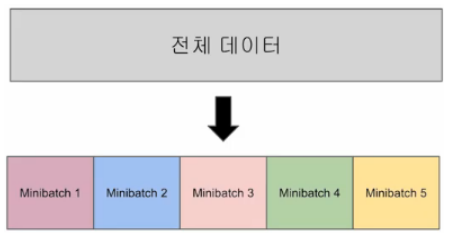

### 이터레이션 (Iteration)

아래 그림은 에포크, 배치 크기와 이터레이션의 관계이다. 이터레이션은 한 번의 에포크 내에서 이루어지는 매개변수인 가중치(Weight)와 편향(b)의 업데이트 횟수이다. 전체 데이터 수가 2,000개일 때 배치 크기를 다음과 같이 200으로 한다면 이터레이션의 총 수는 10개이다. 이는 한 번의 에포크 당 매개변수 업데이트가 10번 이루어지는 것이다.



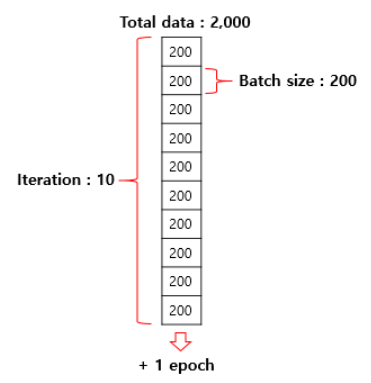

In [ ]:
# 파이토치에서 데이터를 더 쉽게 다룰 수 있도록 Dataset과 DataLoader를 지원함.
# 이를 사용하면 미니 배치 학습, 데이터 셔플, 병렬처리까지 가능함.
# 실습
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [ ]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [ ]:
dataset = TensorDataset(x_train, y_train)

In [ ]:
dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)
# shuffle: 순서에 익숙해지지 않도록 데이터셋 훈련 순서를 섞음

In [ ]:
model = nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)

In [ ]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 200 == 0:
      print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
      epoch, nb_epochs, batch_idx+1, len(dataloader),
      cost.item()
        ))

Epoch    0/1000 Batch 1/3 Cost: 40394.078125
Epoch    0/1000 Batch 2/3 Cost: 10625.847656
Epoch    0/1000 Batch 3/3 Cost: 5451.569824
Epoch  200/1000 Batch 1/3 Cost: 10.162233
Epoch  200/1000 Batch 2/3 Cost: 12.199764
Epoch  200/1000 Batch 3/3 Cost: 12.086487
Epoch  400/1000 Batch 1/3 Cost: 7.082793
Epoch  400/1000 Batch 2/3 Cost: 1.760521
Epoch  400/1000 Batch 3/3 Cost: 18.354588
Epoch  600/1000 Batch 1/3 Cost: 5.222972
Epoch  600/1000 Batch 2/3 Cost: 6.434406
Epoch  600/1000 Batch 3/3 Cost: 4.984661
Epoch  800/1000 Batch 1/3 Cost: 3.075500
Epoch  800/1000 Batch 2/3 Cost: 1.627599
Epoch  800/1000 Batch 3/3 Cost: 10.105659
Epoch 1000/1000 Batch 1/3 Cost: 1.048075
Epoch 1000/1000 Batch 2/3 Cost: 2.670271
Epoch 1000/1000 Batch 3/3 Cost: 6.036553


In [ ]:
# 예측값 확인
new_var = torch.FloatTensor([[73, 80,75]])

pred_y = model(new_var)
print('훈련 후 예측값 (입력: 73, 80, 75):', pred_y)
# 152.5737로 152에 가까움

훈련 후 예측값 (입력: 73, 80, 75): tensor([[153.7884]], grad_fn=<AddmmBackward0>)


In [ ]:
# Custom Dataset
# torch.utils.data.Dataset: 파이토치에서 데이터셋을 제공하는 추상 클래스
# Custom Dataset으로 선형회귀 구현

import torch
import torch.nn.functional as nn

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset): 
  def __init__(self):  # 데이터셋 전처리
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  def __len__(self): # 총 데이터 수 리턴
    return len(self.x_data)

# 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx): # 데이터셋에서 특정 1개의 샘플 가져옴
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [ ]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)

In [ ]:
model = torch.nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):


    x_train, y_train = samples

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 5 == 0:
      print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))
      
print(batch_idx)
print(samples)

Epoch    0/20 Batch 1/3 Cost: 30295.957031
Epoch    0/20 Batch 2/3 Cost: 8719.498047
Epoch    0/20 Batch 3/3 Cost: 3114.705566
Epoch    5/20 Batch 1/3 Cost: 13.949730
Epoch    5/20 Batch 2/3 Cost: 17.440434
Epoch    5/20 Batch 3/3 Cost: 34.228283
Epoch   10/20 Batch 1/3 Cost: 19.290125
Epoch   10/20 Batch 2/3 Cost: 21.001181
Epoch   10/20 Batch 3/3 Cost: 3.088081
Epoch   15/20 Batch 1/3 Cost: 17.184650
Epoch   15/20 Batch 2/3 Cost: 13.783848
Epoch   15/20 Batch 3/3 Cost: 1.741090
Epoch   20/20 Batch 1/3 Cost: 10.154287
Epoch   20/20 Batch 2/3 Cost: 17.591785
Epoch   20/20 Batch 3/3 Cost: 20.448374
2
[tensor([[93., 88., 93.]]), tensor([[185.]])]


In [ ]:
new_var = torch.FloatTensor([[73, 80, 75]])

pred_y = model(new_var)

print("훈련 후 입력값이 73, 80, 75일 때 예측값 :", pred_y)
print(list(model.parameters()))

훈련 후 입력값이 73, 80, 75일 때 예측값 : tensor([[157.4490]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.4414, 1.2173, 0.3737]], requires_grad=True), Parameter containing:
tensor([-0.1901], requires_grad=True)]


## Logistic Regression By Pytorch

In [ ]:
# 로지스틱 회귀분석: 이진 분류 해결을 위한 대표적인 알고리즘
# 이름은 회귀지만 분류 작업으로 사용 가능 (그래프: 누위있는 S자 형태)

In [ ]:
# 실습
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 시그모이드 함수 정의
def sigmoid(x):
  return(1/(1+np.exp(-x)))

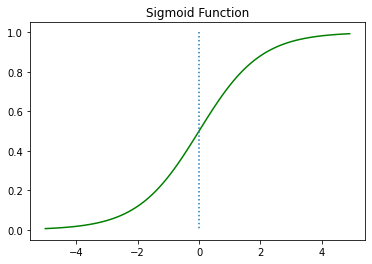

In [ ]:
# w = 1, b = 0인 그래프
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0,0], ':')
plt.title('Sigmoid Function')
plt.show()

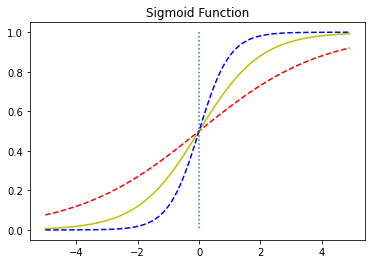

In [ ]:
# 가중치 변화에 따른 경사도 변화

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'y') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

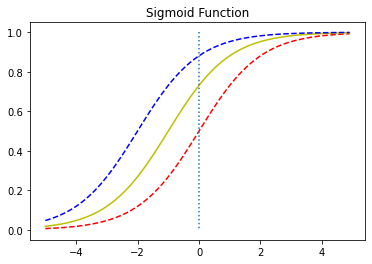

In [ ]:
# 편향 변화에 따른 좌, 우 이동 표현

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = sigmoid(x+1)
y3 = sigmoid(x+2)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'y') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 2
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

# 시그모이드 함수는 0 ~ 1 사이의 값을 가지는데, 임계값을 0.5로 예시로 들면
# 0.5 이상이면 1 (True), 0.5 이하면 0 (False)로 판단하도록 할 수 있음

In [ ]:
# 비용 함수
# 로지스틱 회귀는 경사하강법 사용했을 때, 실제로 mse가 최소가 되는 지점을 잘못 찾을 수
# 있기 때문에, 전체 함수의 최소값(Global Minimum)을 찾아야 함.
# 그래서 실제값과 예측값의 차이가 동일하게 발생하도록 하려면 로그함수 사용해야함

# Logistic Regression By Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [ ]:
# Dataset
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [ ]:
# 행렬 연산을 위한 로그함수 구현
hy = torch.sigmoid(x_train.matmul(W)+b);print(hy)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [ ]:
print(hy) # 예측값
print(y_train) # 실제값

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [ ]:
F.binary_cross_entropy(hy, y_train) # cost 계산

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
# 로지스틱 학습

# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [ ]:
# 훈련된 가중치, 편향 기준 가설검정
hy = torch.sigmoid(x_train.matmul(W)+b);print(hy)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [ ]:
prediction = hy >= torch.FloatTensor([0.5])
print(prediction) # 기존 값과 동일하게 예측됨

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [ ]:
# 훈련된 가중치, 편향 확인
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


In [ ]:
# nn.Linear와 nn.Sigmoid로 로지스틱 회귀 구현

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [ ]:
torch.manual_seed(1)

In [ ]:
# 훈련 데이터 세팅
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
model = nn.Sequential(
    nn.Linear(2,1), # (2, 1) 2차원 텐서
    nn.Sigmoid() # Sigmoid 거침
)

In [ ]:
model(x_train) # 임의의 값이기 때문에 의미 x. 훈련 시켜야함

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [ ]:
# 데이터 훈련

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr = 1)

nb_epochs = 2000
for epoch in range(nb_epochs + 1):
  
  hy = model(x_train) # y 계산
  
  cost = F.binary_cross_entropy(hy, y_train) # cost 계산

  # cost 기반 optimizer 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
   prediction = hy >= torch.FloatTensor([0.5]) # T/F 구별
   correct_prediction = prediction.float() == y_train # 실제값과 일치할 때만 True로 간주
   accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도 계산
   print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))




Epoch    0/2000 Cost: 0.539713 Accuracy 83.33%
Epoch  100/2000 Cost: 0.134272 Accuracy 100.00%
Epoch  200/2000 Cost: 0.080486 Accuracy 100.00%
Epoch  300/2000 Cost: 0.057820 Accuracy 100.00%
Epoch  400/2000 Cost: 0.045251 Accuracy 100.00%
Epoch  500/2000 Cost: 0.037228 Accuracy 100.00%
Epoch  600/2000 Cost: 0.031649 Accuracy 100.00%
Epoch  700/2000 Cost: 0.027538 Accuracy 100.00%
Epoch  800/2000 Cost: 0.024381 Accuracy 100.00%
Epoch  900/2000 Cost: 0.021877 Accuracy 100.00%
Epoch 1000/2000 Cost: 0.019843 Accuracy 100.00%
Epoch 1100/2000 Cost: 0.018157 Accuracy 100.00%
Epoch 1200/2000 Cost: 0.016736 Accuracy 100.00%
Epoch 1300/2000 Cost: 0.015523 Accuracy 100.00%
Epoch 1400/2000 Cost: 0.014474 Accuracy 100.00%
Epoch 1500/2000 Cost: 0.013558 Accuracy 100.00%
Epoch 1600/2000 Cost: 0.012752 Accuracy 100.00%
Epoch 1700/2000 Cost: 0.012036 Accuracy 100.00%
Epoch 1800/2000 Cost: 0.011397 Accuracy 100.00%
Epoch 1900/2000 Cost: 0.010822 Accuracy 100.00%
Epoch 2000/2000 Cost: 0.010303 Accuracy 1

In [ ]:
model(x_train)

tensor([[5.4392e-05],
        [1.6840e-02],
        [2.0155e-02],
        [9.7645e-01],
        [9.9951e-01],
        [9.9994e-01]], grad_fn=<SigmoidBackward0>)

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.8958, 1.8564]], requires_grad=True), Parameter containing:
tensor([-17.4279], requires_grad=True)]


In [ ]:
# 클래스로 파이토치 로지스틱 회귀 구현
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
# 클래스 설정
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

In [ ]:
model = BinaryClassifier()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00%
Epoch  300/1000 Cost: 0.057820 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045251 Accuracy 100.00%
Epoch  500/1000 Cost: 0.037228 Accuracy 100.00%
Epoch  600/1000 Cost: 0.031649 Accuracy 100.00%
Epoch  700/1000 Cost: 0.027538 Accuracy 100.00%
Epoch  800/1000 Cost: 0.024381 Accuracy 100.00%
Epoch  900/1000 Cost: 0.021877 Accuracy 100.00%
Epoch 1000/1000 Cost: 0.019843 Accuracy 100.00%


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


## Softmax Regression By Pytorch

In [ ]:
# 소프트맥스 회귀: 3개 이상의 선택지로부터 1개를 선택하는 문제인
# 다중 클래스분류를 풀기 위한 기법

In [ ]:
# 원 핫 인코딩 필수 (범주형 데이터 처리)
# 예시
"""
강아지 = [1, 0, 0]
고양이 = [0, 1, 0]
냉장고 = [0, 0, 1]
"""

In [ ]:
# 이론

"""
소프트맥스 회귀의 경우, 확률의 총 합이 1이 되는 것을 활용하여 다중 클래스 분류 문제에 활용함.
3개의 선택지가 있다고 가정했을 때, p1,p2,p3에 대해 각각 정답일 확률을 계산하여 최적의 선택지를
선택함.

오차 계산의 경우 원 핫 벡터로 수치화하여 보면 됨.

엔트로피 함수: 공부 좀 더 해보기,,

"""

'\n소프트맥스 회귀의 경우, 확률의 총 합이 1이 되는 것을 활용하여 다중 클래스 분류 문제에 활용함.\n3개의 선택지가 있다고 가정했을 때, p1,p2,p3에 대해 각각 정답일 확률을 계산하여 최적의 선택지를\n선택함.\n\n오차 계산의 경우 원 핫 벡터로 수치화하여 보면 됨.\n\n엔트로피 함수: 공부 좀 더 해보기,,\n\n'

In [ ]:
# 소프트맥스 회귀 기초 확인 및 비용함수 구현
import torch
import torch.nn.functional as F

In [ ]:
torch.manual_seed(1)

In [ ]:
z = torch.FloatTensor([1,2,3])

In [ ]:
hy = F.softmax(z, dim=0)
print(hy) # 0와 1 사이의 값 가지는 벡터로 반환됨
print(hy.sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [ ]:
# 비용 함수 구현
z = torch.rand(3, 5, requires_grad = True)

In [ ]:
hy = F.softmax(z, dim=1)
print(hy)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [ ]:
y = torch.randint(5, (3,)).long()
print(y)

tensor([0, 2, 1])


In [ ]:
y_one_hot = torch.zeros_like(hy)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [ ]:
print(y.unsqueeze(1))

tensor([[0],
        [2],
        [1]])


In [ ]:
print(y_one_hot)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])


In [ ]:
# 비용 함수 메인
cost = (y_one_hot * -torch.log(hy)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


In [ ]:
# 파이토치로 스프트맥스 비용 함수 구현
# F.softmax() + torch.log() = F.log_softmax()
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [ ]:
# F.log_softmax() + F.nll_loss() = F.cross_entropy()
# nll = Negative Log Likelihood
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [ ]:
# 소프트맥스 회귀 구현
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [ ]:
print(x_train.shape)
print(y_train.shape)

# y_train 원 핫 인코딩 해야함

torch.Size([8, 4])
torch.Size([8])


In [ ]:
y_one_hot = torch.zeros(8,3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [ ]:
# 모델 구현

# 모델 초기화용
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568256
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [ ]:
# 소프트맥스 회귀로 MNIST 데이터 분류
# 손글씨 데이터. 28 * 28 픽셀

# 토치비전 활용해서 하면 됨

import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [ ]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [ ]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
training_epochs = 15
batch_size = 100

In [ ]:
# MNIST 분류기 구현
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# root: 데이터셋 경로, 
# train: True 주면 MNIST의 훈련데이터 리턴, False는 테스트 데이터
# transform: 현재 데이터 파이토치 텐서로 변환
# download: 데이터셋 없으면 다운로드

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
# Data loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)
# drop_last 하는 이유: 마지막 남은 데이터가 배치 사이즈를 만족하지 못하면 버려야 함
# (마지막 배치는 경사하강법에 사용하여 마지막 배치가 상대적으로 과대평가 되는 것 막음)

In [ ]:
linear = nn.Linear(784, 10, bias = True).to(device)

In [ ]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [ ]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577715
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933438
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074119
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422765
Learning finished


Accuracy: 0.8883000016212463
Label:  2
Prediction:  2


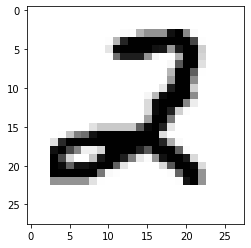

In [ ]:
# 모델 테스트 (Accuracy: 0.8883)

with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

## 인공신경망 (ANN)

In [ ]:
# 데이터: 훈련용(Training), 검증용(Vaildation), 테스트 (Testing) 총 3가지로 나눔
# 이유: 검증용은 모델의 성능 평가가 아닌 성능 조절용임 (과적합 판단, 하이퍼파라미터 조정용)
# 매개변수: 편향, 가중치 등 학습 통해 바뀌는 변수
# 데이터 양 충분하지 않으면 K-Fold 등으로 교차 검증

# 퍼셉트론 (Perceptron)
"""
입력값과 가중치가 함께 인공뉴런에 향하는 것임. 각 입력값이 가중치와 곱해져서 인공 뉴런에
보내지고, 각 입력값과 그 가중치의 곱의 전체 합이 임계치(threshold)를 넘으면 종착지에 있는
인공뉴런은 출력 신호로서 1을 출력하고, 그렇지 않으면 0을 출력함. 이러한 함수를 계단 함수
라고 함. 이러한 임계치 값을 수식으로 표현할 때 세타(θ)로 표현함.

이렇게 뉴런에서 출력값 변경하는 함수를 활성화함수(Activation Function)이라고 함. 시그모이드나
소프트맥스 함수같은 것들도 활성화함수 중 하나임.
"""

## 단층 퍼셉트론
"""
단층 퍼셉트론: 값 보내는 단계, 내보내는 단계 총 2단계로만 이루어져있음.
and, nand, or 게이트 쉽게 구현 가능 (두 개의 입력값, 하나의 출력값)
"""

'\n단층 퍼셉트론: 값 보내는 단계, 내보내는 단계 총 2단계로만 이루어져있음.\nand, nand, or 게이트 쉽게 구현 가능 (두 개의 입력값, 하나의 출력값)\n'

In [ ]:
# 단층 퍼셉트론 예시_AND
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)
# AND gate는 두 개의 입력값이 모두 1일 때만 1 출력

(0, 0, 0, 1)

In [ ]:
# 단층 퍼셉트론 예시_NAND
def NAND_gate(x1, x2):
    w1=-0.5
    w2=-0.5
    b=0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)
# NAND gate는 두 개의 입력값이 모두 1일 때만 0 출력

(1, 1, 1, 0)

In [ ]:
# 단층 퍼셉트론 예시_OR
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)
# OR gate는 두 개 중 하나의 입력값이 1이면 1 출력
# 단, 단층 퍼셉트론은 XOR gate는 구현 불가능함 (이거는 두 개의 값이 다를 때 1 출력
# 하는 게이트인데, 단층 퍼셉트론은 직선 하나로 두 영역을 나누는 것만 구현 가능)

(0, 1, 1, 1)

In [ ]:
# 다중 퍼셉트론(MultiLayer Perceptron, MLP)
# XOR gate는 기존의 and, nand, or 게이트 조합하면 만들 수 있음 (층 여러 개 쌓아서)
# 다중 퍼셉트론은 입력층과 출력층 사이에 은닉층(hidden layer)을 추가하는 것임.
# 은닉층 2개 이상인 신경망: 심층 신경망(Deep Neural Network, DNN)

In [ ]:
# 파이토치로 단층 퍼셉트론 구현
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
# 입출력 정의
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
linear = nn.Linear(2, 1, bias = True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [ ]:
# 비용함수, optimizer 정의

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 1)

In [ ]:
#10,001번의 에포크 수행. 0번 에포크부터 10,000번 에포크까지.
for step in range(10001): 
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 500 == 0: # 500번째 에포크마다 비용 출력
        print(step, cost.item())

# 비용 줄어들지 않는 이유: 단층 퍼셉트론으론 XOR 문제를 풀 수 없기 때문

0 0.7273974418640137
500 0.6931471824645996
1000 0.6931471824645996
1500 0.6931471824645996
2000 0.6931471824645996
2500 0.6931471824645996
3000 0.6931471824645996
3500 0.6931471824645996
4000 0.6931471824645996
4500 0.6931471824645996
5000 0.6931471824645996
5500 0.6931471824645996
6000 0.6931471824645996
6500 0.6931471824645996
7000 0.6931471824645996
7500 0.6931471824645996
8000 0.6931471824645996
8500 0.6931471824645996
9000 0.6931471824645996
9500 0.6931471824645996
10000 0.6931471824645996


In [ ]:
# 단층 퍼셉트론 예측값 확인
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())


# 맞지 않은 퍼셉트론으로 구현하여 정확도가 떨어짐

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


In [ ]:
# 역전파 개요
'''
인공신경망 - 예제에서 사용할 인공 신경망은 입력층, 은닉층, 출력층 3개의 층 있음
각자 두 개의 층으로 구현 (은닉층과 출력층 모든 뉴런: 시그모이드 함수 사용)

순전파(Forward Propagation): 각 입력은 입력층에서 은닉층으로 향하면서, 각 입력에
해당하는 가중치와 곱해지고, 그 결과 가중합으로 계산되어 은닉층 뉴런에 있는 시그모이드
함수의 입력값이 됨. 그 과정에서 입력값은 시그모이드 함수에서 계산됨. 계산된 값은 다시
출력층의 뉴론으로 향하는데, 이 과정에서 가중치와 곱해져서 가중합이 되어 출력층 뉴런의
시그모이드 함수의 입력값이 됨. 이 값이 출력값(예측값)이 됨.
그러면 예측값과 실제값의 오차를 계산하기 위한 오차 함수를 선택해야 하는데, 오차를 계산하기
위한 손실함수(Loss function)은 MSE 사용
'''

In [ ]:
# 역전파
# 역전파는 반대로 출력층에서 입력층 방향으로 계산하면서 가중치 업데이트 해감.
# https://wikidocs.net/60682 6-4 참고

In [ ]:
# 다중 퍼셉트론 구현 - XOR
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

# 입력층, 은닉층 총 3개, 출력층 총 5개의 층으로 구성

In [ ]:
# 비용함수, optimizer 선언
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 1) # modified learning rate from 0.1 to 1

In [ ]:
for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(epoch, cost.item())

0 0.6948983669281006
500 0.6931473016738892
1000 0.6931380033493042
1500 0.6931284666061401
2000 0.6931171417236328
2500 0.6931014657020569
3000 0.6930763125419617
3500 0.6930283904075623
4000 0.6929103136062622
4500 0.6924278736114502
5000 0.6820820569992065
5500 0.005032628774642944
6000 0.0013024783693253994
6500 0.0007136859931051731
7000 0.0004836485313717276
7500 0.00036286652903072536
8000 0.00028899149037897587
8500 0.00023934218916110694
9000 0.0002038097009062767
9500 0.00017716118600219488
10000 0.0001565046259202063


In [ ]:
with torch.no_grad():
  hypothesis = model(X)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted==Y).float().mean()
  print('모델 출력값 (hypothesis):', hypothesis.detach().cpu().numpy())
  print('모델 예측값 (predicted):', predicted.detach().cpu().numpy())
  print('실제값(Y):', Y.cpu().numpy())
  print('정확도(accuracy):', accuracy.item())

모델 출력값 (hypothesis): [[1.1169227e-04]
 [9.9982882e-01]
 [9.9984241e-01]
 [1.8534942e-04]]
모델 예측값 (predicted): [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y): [[0.]
 [1.]
 [1.]
 [0.]]
정확도(accuracy): 1.0


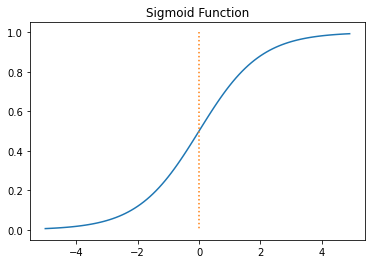

In [ ]:
# 비선형 활성화 함수: 입력을 받아 수학적 변환을 수행하고 결과값 출력하는 함수.
# 은닉층에서 활성화 함수로 시그모이드 함수는 지양해야 함. 대신 렐루(ReLU)함수 사용

# 활성화 함수의 특징은 비선형 함수여야 함. 비선형 함수는 직선 1개로 그릴수 없는 함수임.
# 인공 신경망의 능력을 높이려면 은닉층을 계속해서 쌓아야 하는데, 선형함수를 사용하게 되면
# 은닉층을 여러번 추가한 것이나 한번 추가한 것이나 다를게 없음 (선형 함수 층이 의미가 없는 것은 아님)


# 시그모이드 함수와 기울기 소실

# 시그모이드 함수 그래프
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

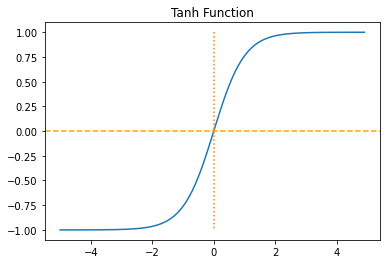

In [ ]:
# 시그모이드 함수의 경우, 역전파 과정에서 아주 작은 가중치가 곱해지면 앞단에는
# 가중치가 잘 전달되지 않음. 이러한 현상을 기울기 소실(Vanishing Gradient)문제 라고 함.
# 그래서 시그모이드 함수를 은닉층에서 활용하는 것은 지양됨.

# 그나마 조금 사용되는 선형함수로 하이퍼볼릭탄젠트 함수(tanh)가 있음.
# 이것은 입력값을 -1과 1 사이의 값으로 변환하는 함수임.

#tanh 함수
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

# 0이 중심값이여서 기울기 소실이 적음

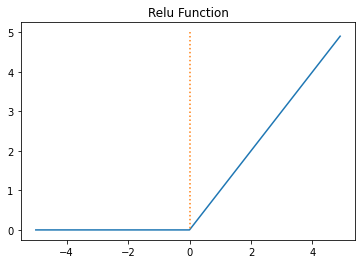

In [ ]:
# 렐루 함수 (ReLU)
# f(x) = max(0, x)
# 매우 간단하기 때문에 연산이 빠르고, 특정 양수 값에 수렴하지 않기 때문에 깊은 신경망에서
# 시그모이드 함수보다 더 잘 작동함. 하지만 입력값이 음수면 기울기도 0이 되는 현상이 발생함.
# 또한 이 뉴런은 회생하기 어려움. 이러한 문제를 죽은 렐루(dying ReLU)라고 함.

# 렐루 함수구현
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

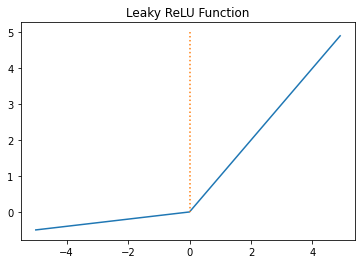

In [ ]:
# 죽은 렐루를 보완하기 위한 ReLU의 변형 함수들이 등장함. 대표적으로 Leaky ReLU가 있음
# 이것은 입력값이 음수일 때 0이 아니라 0.01같은 매우 작은 수를 반환함.
# f(x) = max(ax, x). a = 하이퍼파라미터 (새는 정도), 일반적으로 0.01의 값

# Leaky ReLU 구현

a = 0.1 # 기울기 표현 위한 임의의 수
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

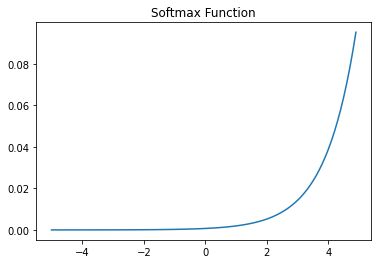

In [ ]:
# 소프트맥스 함수 (Softmax function)
# 분류 문제 (로지스틱, 소프트맥스)를 출력층에 적용하여 사용하기 때문에, 이것도 필요함
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x,y)
plt.title('Softmax Function')
plt.show()

# 소프트맥스는 3개 이상의 선택지 중 하나를 고르는 다중 클래스 분류에 주로 사용됨.

In [ ]:
# 다층 퍼셉트론으로 손글씨 분류
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits() # 이미지 데이터 로드


In [ ]:
print(digits.images[0]) # 0: 흰색, 0 아닌 것: 검은색 점
print(digits.target[0]) # 레이블링 값: 0

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


In [ ]:
len(digits.images) # 전체 샘플 개수

1797

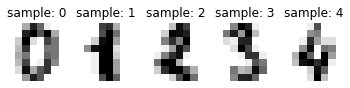

In [ ]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [ ]:
for i in range(5):
  print(i, '번 인덱스 샘플의 레이블: ', digits.target[i])

0 번 인덱스 샘플의 레이블:  0
1 번 인덱스 샘플의 레이블:  1
2 번 인덱스 샘플의 레이블:  2
3 번 인덱스 샘플의 레이블:  3
4 번 인덱스 샘플의 레이블:  4


In [ ]:
# 8 * 8 행렬 64차원의 벡터로 변환해서 저장한 것 불러오기
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
x = digits.data
y = digits.target

In [ ]:
# 다중 퍼셉트론 분류기
import torch
import torch.nn as nn
from torch import optim

In [ ]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(), 
    nn.Linear(32, 16), # input_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16,10) # hiden_layer3 = 16, output_layer = 10
)

In [ ]:
x = torch.tensor(x, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.int64)

In [ ]:
loss_fn = nn.CrossEntropyLoss() # 소프트맥스 함수 포함

In [ ]:
optimizer = optim.Adam(model.parameters())

In [ ]:
losses = []

In [ ]:
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(x) # forwar 연산
  loss = loss_fn(y_pred, y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

  losses.append(loss.item())

Epoch    0/100 Cost: 2.391002
Epoch   10/100 Cost: 1.947970
Epoch   20/100 Cost: 1.644414
Epoch   30/100 Cost: 1.321318
Epoch   40/100 Cost: 0.992882
Epoch   50/100 Cost: 0.729199
Epoch   60/100 Cost: 0.543885
Epoch   70/100 Cost: 0.417454
Epoch   80/100 Cost: 0.330297
Epoch   90/100 Cost: 0.269283


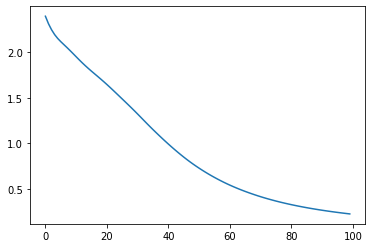

In [ ]:
plt.plot(losses)

In [ ]:
# 다중 퍼셉트론으로 MNIST 분류하기

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [ ]:
mnist.target[0]

'5'

In [ ]:
mnist.target = mnist.target.astype(np.int8)

In [ ]:
X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

In [ ]:
X[0]

KeyError: ignored

In [ ]:
y[0]

In [ ]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

KeyError: ignored

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train.values)
X_test = torch.Tensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [ ]:
# 다중 퍼셉트론
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch))

In [ ]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [ ]:
test()


테스트 데이터에서 예측 정확도: 993/10000 (10%)



In [ ]:
for epoch in range(3):
    train(epoch)

print(test())

epoch0：완료

epoch1：완료

epoch2：완료


테스트 데이터에서 예측 정확도: 9633/10000 (96%)

None


예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


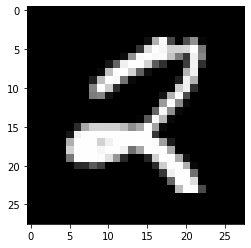

In [ ]:
index = 1258

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

In [ ]:
# 과적합 막는 방법
# 과적합은 모델 성능 떨어뜨리는 주요 이슈이기 때문에, 인공신경망에서 과적합 막는 방법

# 1: 데이터 양 늘리기
# 모델은 데이터의 양이 적으면, 데이터의 특정 패턴이나 노이즈까지 암기될 위험이 있음.
# 만약 데이터 양이 적으면 의도적으로 데이터 증식이나 증강 등을 사용함.
# 예시: 이미지를 회전하거나 노이즈를 추가하고, 일부분을 수정하는 등의 방법 사용



In [ ]:
# 2. 모델 복잡도 줄이기
# 은닉층의 수나 매개변수의 수 등으로 결정되는데, 인공신경망 복잡도를 줄이면 과적합 해결가능

# 예시
class Architecture1(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Architecture1, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.relu = nnReLU()
    self.fc3 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.relu(out)
    out = self.fc3(out)
    return out

# 여기는 은닉층이 3개인데,

class Architecture1(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Architecture1, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

# 이런 식으로 은닉층을 2개로 줄이는 방법 등을 사용하면 됨.

In [ ]:
# 3. 가중치 규제(Regularization) 적용하기
# 복잡한 모델을 좀 더 간단하게 하는 방법으로 가중치 규제가 있음.
# L1 규제: 가중치 w들의 절대값 합계를 비용 함수에 추가함. L1 노름이라고도 함.
# L2 규제: 모든 가중치 w들의 제곱합을 비용 함수에 추가함. L2 노름이라고도 함.

In [ ]:
# 4. 드롭아웃(Dropout)
# 학습 과정에서 신경망의 일부를 사용하지 않는 방법임
# 예시: 드롭아웃 비율 0.5로 하면 학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않음
# 드롭아웃은 신경망 학습시에만 사용되고, 예측시에는 사용하지 않는 것이 일반적임

In [ ]:
# 기울기 소실(Gradient)과 폭주(Exploding)
# 깊은 인공 신경망을 학습하다보면 역전파 과정에서 입력층으로 갈수록 기울기가 점차
# 작아지는 현상이 발생할 수 있음. 이것을 기울기 소실이라고 함.

# 반대의 경우 (기울기 점차 커지다 비정상적으로 큰 값이 됨)는 기울기 폭주임. RNN에서 주로 발생

In [ ]:
# 기울기 소실, 기울기 폭주 막는 방법
# 1. ReLU와 ReLU 변형 (위에 다시 보고오면 됨)

In [ ]:
# 2. 가중치 초기화

# 2-1. 세이비어 초기화
# 균등분포와 정규본포를 활용하여 초기화하면 됨. 세이비어 초기화는 여러 층의 기울기
# 분산 사이에 균형을 맞춰서 특정 층이 너무 주목받거나 뒤처지는 것을 방지함.
# 근데 시그모이드나 하이퍼볼릭 탄젠트를 사용할 땐 효과가 좋은데, 렐루랑 사용하면 안좋음.

# 2-2. He 초기화
# 세이비어 초기화와 정규 분포나 균등분포 활용하는건 같은데, 다음 층의 뉴런 개수는 반영하지
# 않음. 이건 렐루 계열 함수랑 같이 사용할 때 효과적임.

In [ ]:
# 3. 배치 정규화
# 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하는 것

# 3-1. 내부 공변량 변화 (Internal Covariate Shift)
# 내부 공변량 변화: 학습 과정에서 층 별로 입력 데이터의 분포가 달라지는 것
# 기울기 소실 및 폭주 등의 딥러닝 모델 불안정성이 층마다 입력의 분포가 달라지기 때문

# 공변량 변화: 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 것
# 내부 공변량 변화: 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화

# 3-2. 배치 정규화(Batch Normalization)
# 한 번에 들어오는 배치 단위로 정규화하는 것.

# 배치 정규화 한계
# 1. 미니 배치 크기에 의존적
# 너무 작은 배치 크기에선 잘 작동하지 않음. 배치 크기를 어느정도 크게 하고 해야함

# 2. RNN에 적용하기 어려움
# RNN은 각 시점마다 다른 통계치를 가지는데, 그래서 RNN에 배치 정규화 하는 것은 어려움.
# RNN은 층마다 정규화 실행하는 층 정규화(Layer Normalization)을 적용해야 함

## CNN

In [ ]:
# 합성곱 신경합 (CNN)
# 합성곱 신경합은 크게 합성곱층(Convolution layer)와 풀링층(Pooling layer)로 구성됨.
# 이미지 분류 예시 참고 (7-1)

# 합성곱 신경합은 이미지 처리에 탁월한 성능을 보이는 신경망임.
# 다중 퍼셉트론 역시 이미지 처리가 가능하지만, 조금만 변형돼도 알아보지 못함.

In [ ]:
# 합성곱 신경합 설명

# 채널 (Channel)
# 기계는 숫자 (텐서)를 더 잘 처리하는데, 이미지는 (높이, 너비, 채널)이라는 3차원
# 텐서임. 높이는 이미지의 세로 픽셀 수, 너비는 이미지의 가로 픽셀 수, 채널은 색 성분임.
# 흑백: 1, 컬러: 3

# 합성곱 연산 (Convolution operation)
# 합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출하는 역할을 함.
# 합성곱 연산은 커널이라는 n * m 크기의 행렬로 높이와 너비 크기의 이미지를 처음부터 
# 끝까지 겹치며 훑으면서 겹쳐지는 부분의 각 이미지와 커널의 원소 값을 곱해서 모두 더한
# 값을 출력으로 하는 것임. 가장 왼쪽 위부터 가장 오른쪽 아래까지 순차적으로 훑음.

# 커널은 일반적으로 3*3 or 5*5 사용함 (7-1 이미지 참고)
# 입력으로부터 커널을 사용하여 합성곱 연산을 통해 나온 결과를 특성맵(feature map)이라고 함
# 커널의 크기와 이동 범위 또한 정할 수 있음. 이동 범위를 스트라이드(stride)라고 함

# 패딩 (Padding)
# 합성곱 연산의 결과로 얻은특성 맵은 입력보다 크기가 작아진다는 특징이 있음.
# 합성곱 층을 여러 개 쌓았으면 최종적으로 얻은 특성 맵은 초기 입력보다 매우 작아짐.
# 그래서 이 이후에도 특성 맵의 크기가 입력의 크기와 동일하게 유지되게하고 싶으면
# 패딩을 사용하면 됨. 패딩은 입력의 가장자리에 지정된 개수의 폭만큼 행과 열을 추가하는 것임.
# 주로 값을 0으로 채우는 제로 패딩(Zero Padding)을 사용함

# 가중치와 편향
# 합성곱 신경망에서 가중치는 커널 행렬들의 원소임.
# 합성곱 신경망에서 편향은 커널 합성 후 결과값에 편향을 더한 값임.

# 특성 맵 크기 계산 방법
# 입력 크기, 커널 크기, 스트라이드 값 알면 합성곱 연산 결과인 특성 맵의 크기 알 수 있음.

# 다수 채널 가질 경우의 합성곱 연산 (3차원 텐서 합성곱 연산)
# 다수의 채널을 가진 입력 데이터로 합성곱 연산하려면 커널의 채널 수도 입력 채널 수만큼
# 존재해야 함. 그렇게 하면 채널 별로 합성곱을 연산하고, 결과를 모두 더하여 최종 특성 맵 얻음.
# 커널의 각 채널 크기는 같아야함. (7-1 참고)

# 풀링 (Pooling)
# 합성곱 층(합성곱 연산 + 활성화함수) 다음에는 풀링을 추가하는 것이 일반적임.
# 여기에선 특성 맵을 다운샘플링하여 특성 맵의 크기를 줄이는 풀링 연산이 이루어짐.
# 일반적으로 최대 풀링(max pooling)과 평균 풀링(average pooling)이 사용됨.
# 최대 푸링은 커널과 겹치는 영역 안에서 최대값을 추출하는 방식으로 다운샘플링 함

In [ ]:
# CNN으로 MNIST 분류
# 모델의 아키텍쳐 부르는 방법이 2가지가 있음

# 첫 번째 표기 방법
# 합성곱(nn.Cov2d) + 활성화 함수(nn.ReLU)를 하나의 합성곱으로 보고, 맥스풀링(nn.MaxPoold2d)은
# 풀링 층으로 별도로 명명

# 두 번째 표기 방법
# 합성곱 + 활성화 함수 + 맥스풀링을 하나의 합성곱으로 봄

# 옳고 그름은 없음. 여기에선 맥스풀링까지 포함해서 하나의 합성곱으로 판단



## 1번 레이어 : 합성곱층(Convolutional layer)
# 합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
# 맥스풀링(kernel_size=2, stride=2))

## 2번 레이어 : 합성곱층(Convolutional layer)
# 합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
# 맥스풀링(kernel_size=2, stride=2))

## 3번 레이어 : 전결합층(Fully-Connected layer)
# 특성맵을 펼친다. # batch_size × 7 × 7 × 64 → batch_size × 3136
# 전결합층(뉴런 10개) + 활성화 함수 Softmax

In [ ]:
# 위 3개의 층 구현 (모델 구현)
import torch
import torch.nn as nn

In [ ]:
inputs = torch.Tensor(1,1,28,28)
print('텐서의 크기 : {}'.format(inputs.shape))

텐서의 크기 : torch.Size([1, 1, 28, 28])


In [ ]:
# 합성곱층과 풀링 선언
conv1 = nn.Conv2d(1,32,3,padding=1)
print(conv1)

# 커널: 3*3, stride = 1, padding = 1

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
print(conv2)

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
pool = nn.MaxPool2d(2)
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [ ]:
# 구현체 연결하여 모델 만들기

out = conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [ ]:
out = pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [ ]:
out = conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


In [ ]:
out = pool(out)
print(out.shape)

torch.Size([1, 64, 7, 7])


In [ ]:
out.size(0)

1

In [ ]:
out.size(1)

64

In [ ]:
out = out.view(out.size(0), -1) # 첫 번째 냅두고 나머진 펼치기
print(out.shape)

torch.Size([1, 3136])


In [ ]:
fc = nn.Linear(3136, 10)
out = fc(out)
print(out.shape)

torch.Size([1, 10])


In [ ]:
# CNN으로 MNIST 분류
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)

if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        # ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        # ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        return out

In [ ]:
model = CNN().to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
total_batch = len(data_loader)
print('총 배치 수 : {}'.format(total_batch))

총 배치 수 : 600


In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.224656999
[Epoch:    2] cost = 0.0622547902
[Epoch:    3] cost = 0.0459729321
[Epoch:    4] cost = 0.0371991843
[Epoch:    5] cost = 0.0311085824
[Epoch:    6] cost = 0.026000686
[Epoch:    7] cost = 0.021483168
[Epoch:    8] cost = 0.0179628972
[Epoch:    9] cost = 0.0159521066
[Epoch:   10] cost = 0.0128909582
[Epoch:   11] cost = 0.0101669338
[Epoch:   12] cost = 0.00972386263
[Epoch:   13] cost = 0.00807019603
[Epoch:   14] cost = 0.00636637397
[Epoch:   15] cost = 0.00779043743


In [ ]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.988099992275238


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
# 깊은 CNN으로 MNIST분류
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [ ]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed(777)

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
mnist_train = dsets.MNIST(root = 'MNIST_data/',
                          train=True,
                          transform = transforms.ToTensor(),
                          download = True)

mnist_test = dsets.MNIST(root = 'MNIST_data/',
                         train = False,
                         transform = transforms.ToTensor(),
                         download = True)

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          drop_last= True)

In [ ]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [ ]:
model = CNN().to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 600


In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0

  for X, Y in data_loader:
    X = X.to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hyposis = model(X)
    cost = criterion(hyposis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.190376848
[Epoch:    2] cost = 0.0519742146
[Epoch:    3] cost = 0.0368775055
[Epoch:    4] cost = 0.0306170303
[Epoch:    5] cost = 0.0231020916
[Epoch:    6] cost = 0.0201502983
[Epoch:    7] cost = 0.0173908304
[Epoch:    8] cost = 0.0148926619
[Epoch:    9] cost = 0.0115698976
[Epoch:   10] cost = 0.0121288262
[Epoch:   11] cost = 0.0104879858
[Epoch:   12] cost = 0.010038753
[Epoch:   13] cost = 0.00786824711
[Epoch:   14] cost = 0.00737553183
[Epoch:   15] cost = 0.00880916882


In [ ]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

# Acccuracy: 0.9727, 층을 깊게 쌓는 것이 정확도를 높이는 것만은 아님

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9726999998092651


## 자연어 처리 (전처리 과정)

In [ ]:
# 자연어 처리 과정: 토큰화 - 단어 집합 생성, 정수 인코딩, 패딩, 벡터화 거침

# 토큰화: 텍스트를 단어 혹은 문자 단위로 자르는 것

In [ ]:
#spaCy 활용 토큰화

import spacy

example = "A Dog Run back corner near spare bedrooms"
spacy_en = spacy.blank('en')

In [ ]:
def tokenize(text):
  return[tok.text for tok in spacy_en.tokenizer(text)]

In [ ]:
print(tokenize(example))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [ ]:
# NLTK 활용 토큰화
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
print(word_tokenize(example))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [ ]:
# 형태소 토큰화 (한국어)

# 깃허브에서 Mecab 배시
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 13.01 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 768 kB/s 
     |████████████████████████████████| 453 kB 68.3 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-09-26 05:41:27--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (b

In [ ]:
from konlpy.tag import Mecab
example_kor = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"
tokenizer = Mecab()
print(tokenizer.morphs(example_kor))

# Okt, KKma 등의 형태소 분석기가 있는데, Mecab이 그나마 제일 좋음

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


In [ ]:
# 단어 집합(Vocaabulary) 생성

import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [ ]:
print('전체 샘플의 수 : {}'.format(len(data)))

전체 샘플의 수 : 200000


In [ ]:
sample_data = data[:100]

In [ ]:
# 정규 표현식 활용 데이터 정제

sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
sample_data[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1
5,2190435,사랑을해본사람이라면처음부터끝까지웃을수있는영화,1
6,9279041,완전감동입니다다시봐도감동,1
7,7865729,개들의전쟁나오나요나오면빠로보고싶음,1
8,7477618,굿,1
9,9250537,바보가아니라병쉰인듯,1


In [ ]:
# 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
tokenizer = Mecab()

In [ ]:
tokenized = []
for sentense in sample_data['document']:
  temp = tokenizer.morphs(sentense) 
  temp = [word for word in temp if not word in stopwords] # 불용어 제거
  tokenized.append(temp)

In [ ]:
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


In [ ]:
vocab = FreqDist(np.hstack(tokenized)) # FreqDist: 빈도수 계산기
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 656


In [ ]:
print(vocab['재밌']) # 빈도수 리턴

8


In [ ]:
size = 500
vocab = vocab.most_common(size) # 상위 size만의 단어만 보존
print(len(vocab))


500


In [ ]:
# 각 단어에 고유한 정수 부여
# enumerate() : 순서가 있는 자료형을 입력으로 받아 index를 순차적으로 리턴해줌.
# index 2부터 501까지 인덱스 부여 (0, 1: )
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}

word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [ ]:
# 문자열 정수 변환
encoded = []

for line in tokenized:
  temp = []
  for w in line:
    try:
      temp.append(word_to_index[w]) # 글자가 해당되는 정수로 변환
    except KeyError:
      temp.append(word_to_index['unk']) # 단어 집합에 없는 단어일 경우 unk로 대체

  encoded.append(temp)

In [ ]:
print(encoded[:5])

[[78, 25, 9, 4, 47, 38, 79, 22, 26, 80], [185, 5, 81, 186, 187, 188, 48, 189, 113, 5, 190, 191, 23, 114, 192, 193, 12, 49, 82, 115, 27, 48, 194, 116, 117, 28, 195, 5, 196, 197, 14, 113, 7, 63, 50, 14, 39, 198, 5, 199, 4, 200, 15, 7, 83, 40, 201, 84], [202, 118, 203, 51, 204, 28, 205, 206, 52, 13, 29, 10], [53, 30, 119, 207, 208, 209, 210, 64, 41, 31, 12, 211, 120, 16, 2, 212, 65, 8, 30, 3, 32], [213, 214, 215, 216, 7, 217, 14, 3]]


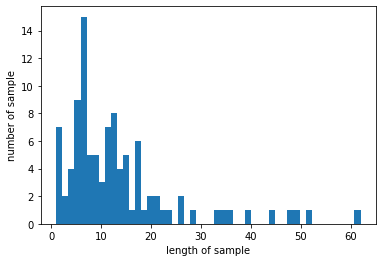

문장 최대 길이 : 62
문장 최소 길이 : 1


In [ ]:
# 패딩: 길이가 다른 문장을 모두 동일한 길이로 바꾸어주는 것 
# 모자란 부분은 다 1이나 0으로 채움 

max_len = max(len(l) for l in encoded)

plt.hist([len(s) for s in encoded], bins = 50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

print('문장 최대 길이 :', max_len)
print('문장 최소 길이 :', min(len(l) for l in encoded))

In [ ]:
for line in encoded:
  if len(line) < max_len:
    line += [word_to_index['pad']] * (max_len - len(line))

print(encoded[:3])

[[78, 25, 9, 4, 47, 38, 79, 22, 26, 80, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [185, 5, 81, 186, 187, 188, 48, 189, 113, 5, 190, 191, 23, 114, 192, 193, 12, 49, 82, 115, 27, 48, 194, 116, 117, 28, 195, 5, 196, 197, 14, 113, 7, 63, 50, 14, 39, 198, 5, 199, 4, 200, 15, 7, 83, 40, 201, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [202, 118, 203, 51, 204, 28, 205, 206, 52, 13, 29, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [ ]:
# Torchtext: 자연어 처리 과정에서 필수는 아니지만, 직접 구현하는 것보다 편리하기도 함

# Torchtext 제공기능

# File Loading
# Tokenization
# 단어 집합 생성
# Mapping (정수 변환)
# Word Vector 생성 (임베딩 벡터 만들어주고, 사전 훈련된 임베딩 벡터 로드도 가능)
# Batching (훈련 샘플 배치 생성, 패딩도 같이 해줌)

In [ ]:
# !pip install torchtext==0.10.1
from torchtext.legacy.data import TabularDataset
import urllib.request
import pandas as pd

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7f97fe0b6290>)

In [ ]:
df = pd.read_csv('IMDb_Reviews.csv', encoding = 'latin1');df.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [ ]:
df.shape

(50000, 2)

In [ ]:
train_df = df[:25000] 
test_df = df[25000:]

In [ ]:
train_df.to_csv('train_data.csv', index = False)
test_df.to_csv('test_data.csv', index = False)

In [ ]:
from torchtext.legacy import data

In [ ]:
text = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=str.split,
                  lower=True,
                  batch_first=True,
                  fix_length=150)

label = data.Field(sequential=False,
                   use_vocab=False,
                   batch_first=False,
                   is_target=True)

In [ ]:
train_data, test_data = TabularDataset.splits(
        path='.', train='train_data.csv', test='test_data.csv', format='csv',
        fields=[('text', text), ('label', label)], skip_header=True)

In [ ]:
print(len(train_data))
print(len(test_data))
print(vars(train_data[0]))

25000
25000
{'text': ['my', 'family', 'and', 'i', 'normally', 'do', 'not', 'watch', 'local', 'movies', 'for', 'the', 'simple', 'reason', 'that', 'they', 'are', 'poorly', 'made,', 'they', 'lack', 'the', 'depth,', 'and', 'just', 'not', 'worth', 'our', 'time.<br', '/><br', '/>the', 'trailer', 'of', '"nasaan', 'ka', 'man"', 'caught', 'my', 'attention,', 'my', 'daughter', 'in', "law's", 'and', "daughter's", 'so', 'we', 'took', 'time', 'out', 'to', 'watch', 'it', 'this', 'afternoon.', 'the', 'movie', 'exceeded', 'our', 'expectations.', 'the', 'cinematography', 'was', 'very', 'good,', 'the', 'story', 'beautiful', 'and', 'the', 'acting', 'awesome.', 'jericho', 'rosales', 'was', 'really', 'very', 'good,', "so's", 'claudine', 'barretto.', 'the', 'fact', 'that', 'i', 'despised', 'diether', 'ocampo', 'proves', 'he', 'was', 'effective', 'at', 'his', 'role.', 'i', 'have', 'never', 'been', 'this', 'touched,', 'moved', 'and', 'affected', 'by', 'a', 'local', 'movie', 'before.', 'imagine', 'a', 'cynic',

In [ ]:
# 단어 집합 (Vocabulary) 만들기
text.build_vocab(train_data, min_freq=10, max_size = 10000)

In [ ]:
# 단어 집합 내 단어 확인
print(text.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f97d3d3ea10>>, {'<unk>': 0, '<pad>': 1, 'the': 2, 'a': 3, 'and': 4, 'of': 5, 'to': 6, 'is': 7, 'in': 8, 'i': 9, 'this': 10, 'it': 11, 'that': 12, '/><br': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'but': 18, 'on': 19, 'movie': 20, 'his': 21, 'not': 22, 'are': 23, 'you': 24, 'film': 25, 'have': 26, 'he': 27, 'be': 28, 'at': 29, 'one': 30, 'by': 31, 'an': 32, 'they': 33, 'from': 34, 'who': 35, 'all': 36, 'like': 37, 'so': 38, 'just': 39, 'or': 40, 'has': 41, 'about': 42, "it's": 43, 'if': 44, 'her': 45, 'some': 46, 'out': 47, 'what': 48, 'very': 49, 'when': 50, 'more': 51, 'there': 52, 'even': 53, 'would': 54, 'my': 55, 'good': 56, 'she': 57, 'their': 58, 'only': 59, 'no': 60, 'really': 61, 'can': 62, 'up': 63, 'had': 64, 'which': 65, 'see': 66, 'were': 67, 'than': 68, '-': 69, 'we': 70, 'been': 71, 'into': 72, 'get': 73, 'much': 74, 'will': 75, 'because': 76, 'story': 77, 'most': 78, '

In [ ]:
# 토치텍스트 데이터로더
from torchtext.legacy.data import Iterator

In [ ]:
batch_size = 5

train_loader = Iterator(dataset = train_data, batch_size = batch_size)
test_loader = Iterator(dataset = test_data, batch_size = batch_size)

# 배치 사이즈: 5, 미니 배치 수: 5000

In [ ]:
batch = next(iter(train_loader))
type(batch)

torchtext.legacy.data.batch.Batch

In [ ]:
print(batch.text[0])

# 텍스트 길이 150인 이유: 앞에서 fix_length를 150으로 정해주었기 때문
# 하나의 미니 배치 크기: 배치크기 * fix_length = 750

tensor([  10,    7,   32,  553,  138,    0,    2,  643,   23,  172,   18,   81,
          22,   49,  500,    2,  130,  248,    3, 4569,   73,  611,   17,   32,
        1280,    0,   54,   28,  242,   44,    2,  439,  144,   73,    8,    2,
         724,  315, 1818,   11,  212,   28, 1599,   18,   81, 1472,   76,   81,
          38,  945, 3274,    4,    4,   59, 3995, 5847,    9,   62,   59,  765,
          48,    2,  572, 4903,    5,    2, 1367,    0,  517,   37,   19,    3,
         187, 1835,  218,   51, 2469,   97,   33,   86,   19, 2390,  745,  467,
          53,  741,    2, 5769, 4458,  549,  193,  104,  430,   35,   23, 3495,
         371,    4, 1087,    2,  209,  169, 5651,    6,    0,   99,  310,   42,
          12,    8,    2,  174,    0,   10,    7,    3,   25,   12, 3717, 4390,
         316,    5, 1002,    0,   13,  159,   37, 8877,  127,   18,   10,    7,
        2894,   52,    7,    3,  313,   12,    9,   83,  139,   16,   10,  399,
           5,  127,    4,   12,   33, 21

In [ ]:
# 토치텍스트 한국어로 해보기
import urllib.request
import pandas as pd

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f97d3ce37d0>)

In [ ]:
train_df = pd.read_table('ratings_train.txt')
test_df = pd.read_table('ratings_test.txt')

In [ ]:

train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
print(len(train_df))
print(len(test_df))

150000
50000


In [ ]:
# 형태소 토큰화 (한국어)

# 깃허브에서 Mecab 배시
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

In [ ]:
# !pip install torchtext==0.10.1
from torchtext.legacy import data
from konlpy.tag import Mecab

In [ ]:
tokenizer = Mecab()

In [ ]:
# 필드 정의
id = data.Field(sequential = False,
                use_vocab = False) # 실제 사용은 하지 않을 예정

text = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=tokenizer.morphs, # 토크나이저로는 Mecab 사용.
                  lower=True,
                  batch_first=True,
                  fix_length=20)

label = data.Field(sequential=False,
                   use_vocab=False,
                   is_target=True)

In [ ]:
from torchtext.legacy.data import TabularDataset

In [ ]:
# !pip install torch==1.8.0
# !pip install torchtext==0.9.0

train_data, test_data = TabularDataset.splits(
    path = '.', train = '/content/ratings_train.txt', test = '/content/ratings_test.txt',
    format = 'tsv', fields = [('id', id), ('test', text), ('label', label)],
    skip_header = True
)

In [ ]:
print(train_data.shape)
print(test_data.shape)

<generator object Dataset.__getattr__ at 0x7f97cc587e50>
<generator object Dataset.__getattr__ at 0x7f97cc587e50>


In [ ]:
print(len(train_data))
print(len(test_data))

150000
50000


In [ ]:
print(vars(train_data[0]))

{'id': '9976970', 'test': ['아', '더', '빙', '.', '.', '진짜', '짜증', '나', '네요', '목소리'], 'label': '0'}


In [ ]:
# 단어 집합 생성
text.build_vocab(train_data, min_freq = 10, max_size = 10000)
# 단어 집합 크기 10000으로 제한 (max_size)
# 집합 중 최소 10번 이상 등장한 단어만 사용 (min_freq)

In [ ]:
len(text.vocab)

10002

In [ ]:
# 토치텍스트 데이터로더 생성
from torchtext.legacy.data import Iterator

In [ ]:
batch_size = 5
train_loader = Iterator(dataset = train_data, batch_size = batch_size)
test_loader = Iterator(dataset = test_data, batch_size = batch_size)

In [ ]:
batch = next(iter(train_loader))

In [ ]:
print(batch.text)

AttributeError: ignored

## 단어 표현 방법 (원핫인코딩 등)

In [ ]:
# 원 핫 인코딩(One-hot Encoding)
# 단어 집합 크기를 벡터의 차원으로 하고, 표현하고싶은 단어 인덱스에 1 부여,
# 다른 인덱스는 0 부여하는 방식

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 453 kB 40.7 MB/s 


In [ ]:
from konlpy.tag import Okt
okt = Okt()
token = okt.morphs("나는 자연어 처리를 배운다")
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [ ]:
word_to_index = {}
for voca in token:
  if voca not in word_to_index.keys():
    word_to_index[voca] = len(word_to_index)
print(word_to_index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [ ]:
# 원 핫 인코딩 생성

def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index))
       index = word2index[word]
       one_hot_vector[index] = 1
       return one_hot_vector

In [ ]:
one_hot_encoding("자연어", word_to_index)

# 원 핫 인코딩 한계: 단어 개수 늘어나면 벡터 공간 늘어나서 비효율적, 단어 유사도 표현x
# 예시: '숙소' 키워드에서 유사한 속성인 '호텔', '게스트 하우스' 등 판별 불가

# 위처럼 원 핫 인코딩과 같은 방법을 희소 벡터 (Sparse Representation)라고 함

# 다른 방법으로 밀집표현 (밀집벡터, Dense vector)이 있음
# 벡터의 차원을 단어 집합의 크기로 설정하지 않고, 사용자가 설정한 값으로 모든 단어의
# 벡터 표현 차원을 맞춰줌. 이 과정에서 0과 1만 가진 값이 아니라 실수값을 가짐.
# 그러면 [0.2, 1.8, 1.1, .....]과 같이 벡터 차원을 맞춘 상태로 표현됨.


[0, 0, 1, 0, 0, 0]

In [ ]:
# 워드 임베딩 (Word Enbedding)

# 단어를 밀집 표현으로 변환하는 방법임. 
# 워드임베딩과 원핫인코딩과의 차이: 저차원이고, 밀집 벡터이며, 훈련 데이터로부터
# 학습하고, 값의 타입이 실수임.

In [ ]:
# 워드 투 벡터 (Word2Vec)

# 단어의 의미 벡터화 하는 것이 워드 투 벡터임 (단어 간 유사도 반영)
# 분산 표현(Distributed Representation): 분포 가설 가정하에 만들어진 표현 방법
# 분산표현 뜻: 비슷한 위치에서 등장하는 단어는 비슷한 의미를 가짐
# 저차원에 단어의 의미를 여러 차원에 분산하여 표현하는데, 이러면 단어 간 유사도 계산 가능

# 분산 표현을 위해 주로 Word2Vec가 많이 쓰임

In [ ]:
# Word2Vec의 방식

# 1. CBOW(Continuous Bag of Words)
# 주변 단어 토대로 중간에 있는 단어를 예측하는 방법

# 2. Skip-Gram
# 중간에 있는 단어 토대로 주변 단어 예측



In [ ]:
# CBOW
# 'the fat cat sat on the mat'와 같은 문장이 있다고 가정하면, 가운데에 'sat'을 예측
# 하는 것이 CBOW가 하는 일임. 이 때 sat을 중심 단어, 예측에 사용되는 단어를 주변 단어라고 함

# 중심 단어를 예측하기 위해 중심단어 기준 앞 뒤로 몇개 단어를 볼지 범위를 정하는 것을
# 윈도우(window)라고 함. 윈도우 크기가 2면, sat을 예측하기 위해 fat, cat, on, the를 참고함.


In [ ]:
# GloVe(Global Vectors for Word Representation)
# 카운트 기반과 예측 기반을 모두 사용하는 방법론 (LSA, Word2Vec 보완 목적)

# LSA: 각 단어의 빈도수 카운트한 행렬이라는 통계 정보 기반으로 차원 축소하여
# 잠재적인 의미를 끌어내지만, 같은 단어 의미의 유추 작업에는 성능이 떨어짐

# Word2Vec: 예측 기반 단어 간 유추 작업에는 LSA보다 뛰어나지만, 임베딩 벡터가 윈도우
# 크기 내에서만 주변 단어를 고려하기 때문에 전체적인 통계 정보를 반영하진 못함.

In [ ]:
# 윈도우 기반 동시 등장 행렬 (Window based Co-occurrence Matrix)
# 행과 열을 전체 단어 집합의 단어로 구성하고, i 단어의 윈도우 크기 내에서 k 단어가 
# 등장한 빈도를 기재한 행렬임.

In [ ]:
# 동시 등장 확률 (Co-occurrence Probability)
# 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장
# 했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률임.

# P(k|i)에서 i를 중심단어, k를 주변 단어라고 할 때, 동시 등장 행렬에서 중심 단어 i
# 의 행의 모든 값을 더한 값이 분모이고, i행 k열의 값을 분자로 한다.                                                                                                                                                                                                

In [ ]:
# 손실 함수
# GloVe 요약: 임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시
# 등장 확률이 되도록 만드는 것.

## RNN

In [1]:
# RNN(Recurrent Neural Network): Sequence 모델로, 입력과 출력을 시퀀스 단위로 처리하는 모델임. 
# 번역기를 예시로, 입력은 번역하고자 하는 문장, 출력은 번역된 문장임.
# 둘 다 단어 시퀀스에 해당하는데, 이러한 시퀀스들을 처리하기 위해 고안된 모델을 시퀀스 모델이라함.
# RNN은 시퀀스 모델의 기본임. (CNN과 RNN은 아예 다름)

In [1]:
# RNN의 특징
# RNN은 은닉층 노드에서 활성화 함수를 통해 나은 결과값을 출력층 방향과 은닉층 노드의
# 다음 계산 입력으로 보내는 특징을 가지고 있음
# 위처럼 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 '셀'이라 함
# 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행해서 메모리 셀이라고도 함

# 메모리 셀이 다음 시점 t+1의 자신에게 보내는 값을 은닉 상태라고 함 (출력층 방향으로 보내는 값)
# 일대다, 다대일, 다대다 등 입력과 출력의 길이를 다르게 설정할 수 있어 다양한 용도로 사용 가능

# 일대다는 하나의 이미지 입력에 대해 사진 제목을 출력하는 이미지 캡셔닝 작업 등에 사용 가능.
# 다대일의 경우 입력 문서의 감성 분석이나 스팸 메일 분류 등에 사용 가능
# 다대다의 경우 입력 문장으로부터 대답 문장을 출력하는 챗봇, 번역기, 품사 태깅 등 가능

In [ ]:
# RNN 구현

# 의사 코드 (pseudocode)
hidden_state_t = 0 # 초기 은닉 상태 초기화
for input_t in input_length:
  output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해 입력과 은닉 상태 가지고 연산
  hidden_state_t = output_t # 계산 결과: 현 시점의 은닉 상태가 됨.

# 이런식으로 t-1 시점의 은닉층 출력값을 받아 다시 계산함
# 위 예시는 2D 텐서를 입력으로 받았다고 가정함.

In [5]:
# 실제 구현
import numpy as np
timesteps = 10 # 시점의 수 (NLP에서 문장의 길이에 해당)
input_size = 4 # 입력의 차원 (NLP에서 단어 벡터의 차원에 해당)
hidden_size = 8 # 은닉 상태의 크기 (메모리 셀의 용량)

inputs = np.random.random((timesteps, input_size)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size, ))

In [7]:
print(hidden_state_t) # 8의 크기를 가지는 은닉 상태

[0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
Wx = np.random.random((hidden_size, input_size)) # 8*4 크기의 2D 텐서, 입력에 대한 가중치
Wh = np.random.random((hidden_size, hidden_size)) # 8*8 크기의 2D 텐서, 은닉 상태에 대한 가중치
b = np.random.random((hidden_size, )) # 8*1 크기의 1D 텐서, 편향(bias) 담당

In [9]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


In [11]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs:
  output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b)
# (Wx * Xt) + (Wh * Ht-1) + bias

  total_hidden_states.append(list(output_t))
# 각 시점의 은닉 상태 값을 축적

  print(np.shape(total_hidden_states))
# 각 시점 t별 메모리 셀의 출력 크기는 (timestep, output_dom)

  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0)
# 출력 값 정리

print(total_hidden_states)
# (timestep, output_dim) 코기 출력

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.99984413 0.99999661 0.99866679 0.99999511 0.99998481 0.9998238
  0.99999019 0.99997571]
 [0.99990509 0.99999659 0.99904296 0.99999052 0.99999096 0.99978102
  0.99999365 0.99998452]
 [0.99994232 0.99999765 0.99926738 0.99999723 0.99999635 0.99986809
  0.99999779 0.99999468]
 [0.99989825 0.99999642 0.99905847 0.99998256 0.9999847  0.99980158
  0.99998995 0.99997623]
 [0.99997394 0.99999934 0.99978059 0.99999815 0.9999985  0.99997324
  0.99999924 0.99999854]
 [0.99991535 0.99999881 0.99958238 0.99999491 0.99999747 0.99988306
  0.99999745 0.99999461]
 [0.99994126 0.99999953 0.99980814 0.99999506 0.99999656 0.9999772
  0.99999762 0.99999593]
 [0.99975879 0.99999895 0.99948607 0.9999914  0.99999337 0.99987733
  0.99999105 0.99998205]
 [0.99993295 0.99999903 0.99960925 0.99999579 0.99999141 0.99997003
  0.99999585 0.99999201]
 [0.99996947 0.9999991  0.99971776 0.99999724 0.99999753 0.99996574
  0.99999879 0.99999761]]


In [12]:
# 파이토치로 RNN 구현
import torch
import torch.nn as nn

In [13]:
input_size = 5
hidden_size = 8

In [14]:
# 입력 텐서 정의
inputs = torch.Tensor(1, 10, 5) # batch size, timesteps, input size

In [15]:
# nn.RNN()으로 RNN 셀 정의
cell = nn.RNN(input_size, hidden_size, batch_first = True)

In [16]:
# RNN 셀에 입력하여 출력 확인
outputs, _status = cell(inputs)

In [18]:
print(outputs.shape)
# 뜻: 첫 번째 리턴값의 은닉 상태들은 (1, 10, 8)의 크기를 가짐.
# 10번 시점동안 8차원의 은닉 상태가 출력되었음

torch.Size([1, 10, 8])


In [20]:
print(_status.shape)
# 마지막 시점의 은닉상태는 (1, 1, 8)의 크기를 가짐

torch.Size([1, 1, 8])


In [1]:
# Deep Recurrent Neural Network
# 은닉층이 2개 이상 깊은 신경망도 구현 가능함
import torch
import torch.nn as nn

In [2]:
inputs = torch.Tensor(1, 10 ,5)

In [3]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first = True)

In [6]:
outputs, _status = cell(inputs)

In [7]:
print(outputs.shape)
# 첫 번째 리턴값의 크기는 동일함

torch.Size([1, 10, 8])


In [8]:
print(_status.shape)
# 층의 개수가 2개로 늘어남을 확인할 수 있음

torch.Size([2, 1, 8])


In [3]:
# 양방향 순환 신경망 (Vidrectional Recurrent Nerual Network)
# 시점 t에서의 출력값을 예측할 때 이전 시점의 데이터뿐 아니라 이후 데이터로도 예측할
# 수 있다는 아이디어에 기반 (예시: 영어 빈칸 채우기 문제)

# 위처럼 이전시점 뿐만 아니라 이후 시점 데이터까지 힌트로 활용하기 위해 고안된 것이 양방향 RNN
# 양방향 RNN은 하나의 출력값을 예측하기 위해 두 개의 메모리 셀을 활용함
# 첫 번째: 앞 시점의 은닉상태
# 두 번째: 뒤 시점의 은닉 상태 받아 계산

# 양방향 RNN도 다수의 은닉층을 가질 수 있음. 다만 무조건 은닉층 추가한다고 성능 좋아지는건 아님
# 그럴려면 데이터의 양이 많아야 함

In [5]:
# 구현
import torch
import torch.nn as nn

inputs = torch.Tensor(1,10,5)

In [6]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first = True,
              bidirectional = True)

In [7]:
outputs, _status = cell(inputs)

In [8]:
print(outputs.shape)
# 은닉 상태 크기가 2배인 이유: 양방향 RNN이라 서로 연결되었기 때문

torch.Size([1, 10, 16])


In [9]:
print(_status.shape)
# 층 개수 2배인 이유: 정방향 기준으로 마지막, 역방향 기준으로 첫번째이기 때문

torch.Size([4, 1, 8])


In [1]:
# 장단기 메모리 (Long Short-Term Memory, LSTM)

# 위에서 배운 것은 가장 단순한 형태의 RNN (바닐라 RNN)임.
# 이러한 RNN의 한계는 이전의 계산 결과에 의존하기 때문임. 시점이 길어질수록 앞의 정보가
# 점점 흐려진다는 단점이 있음. 그래서 중요한 정보가 앞에 있을 경우, 예측이 잘못될 수 있음
# 이러한 문제를 장기 의존성 문제라고 함.

# LSTM의 계산식은 은닉층 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트 추가하여 불필요한
# 기억을 지우고, 기억해야할 것을 정함. 즉, 셀 상태(cell state)라는 값을 추가함. (참고)

# 입력 게이트: 현재 정보를 기억하기 위한 게이트
# 현재 시점 t의 x값과 입력 게이트로 이어지는 가중치 Wxi를 곱한 값, 이전 시점 t-1의 은닉 상태가
# 입력 게이트로 이어지는 가중치 Whi를 곱한 값을 더하여 시그모이드 함수로 지남. 이를 it라고 함

# 현재 시점 t의 x값과 입력 게이트로 이어지는 가중치 Wxi를 곱한 값과 이전 시점 t-1의 은닉 상태가
# 입력 게이트로 이어지는 가중치 Whg를 곱한 값을 더하여 하이퍼볼릭탄젠트 함수를 지남. 이건 gt임

# 이러면 시그모이드 함수를 지나 0~1사이 값, 하이퍼볼릭탄젠트 함수를 지나 -1~1 사이 값 2개가 나옴.
# 이 두 개의 값으로 기억할 정보의 양을 구함. (아래 수식 참고해서 결정)


# 삭제 게이트: 기억을 삭제하기 위한 게이트
# 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지날 때, 이 값이 삭제 과정을
# 거친 정보의 양임. 0에 가까울수록 정보가 많이 삭제되고, 1에 가까울수록 정보를 온전히 기억한 것임.
# 이러한 셀 상태 Ct를 장기 상태라고 함.

# 셀 상태를 구하는 방법은 입력 게이트에서 구한 it, gt 두 개의 값에 대해 원소별 곱을 진행함.
# (같은 크기의 두 행렬이 있을 때 같은 위치의 성분끼리 곱하는 것, 식으로는 .로 표현, 이것이 기억할 값임)
# 입력 게이트에서 선택된 기억을 삭제 게이트의 결과값과 더함. 이 값을 현재시점 t의 셀 상태이며,
# 이 값은 다음 t+1 시점의 LSTM 셀로 넘겨짐.
# 삭제게이트 출력값이 0이면 이전 값은 영향력 x, 입력게이트 it 값이 0이면 이전 셀 상태 값에만 의존

# 출력 게이트: 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지난 값임.
# 은닉 상태는 장기 상태의 값이 하이퍼볼릭탄젠트 값을 지났기 때문에 -1~1 사이 값이고, 이거은 출력게이트
# 값과 연산되면서 값이 걸러지는 (중요도 판단) 역할을 함. 단기 상태 값 또한 출력층으로도 향함.

In [2]:
# 파이토치로 LSTM 구현
import torch
import torch.nn as nn

input_dim = 5
hidden_size = 8

# 입력 텐서 정의
inputs = torch.Tensor(1, 10, 5) # batch size, timesteps, input size

cell = nn.LSTM(input_dim, hidden_size, batch_first = True)

In [3]:
outputs, _status = cell(inputs)

In [6]:
print(outputs.shape)

torch.Size([1, 10, 8])


In [9]:
print(_status)

(tensor([[[ 0.1919, -0.0401,  0.1543, -0.1017, -0.1810, -0.1448, -0.1920,
           0.0507]]], grad_fn=<StackBackward0>), tensor([[[ 0.3657, -0.0824,  0.3176, -0.1993, -0.3768, -0.2994, -0.5154,
           0.1390]]], grad_fn=<StackBackward0>))


## 다대다 RNN 활용 텍스트 생성

In [47]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim

In [64]:
# RNN 동작 이해 (문자 시퀀스 입출력)
# 훈련 데이터 전처리

input = 'apple'
label = 'pple!'
char_vocab = sorted(list(set(input+label)))
vocab_size = len(char_vocab)
print(vocab_size)

# 5개의 문자 존재

5


In [65]:
# 하이퍼파라미터 정의 (원핫벡터)
input_size = vocab_size
hidden_size = 5
output_size = 5
learning_rate = 0.1

In [66]:
# 문자에 고유 정수 부여
char_to_index = dict((c, i) for i, c in enumerate(char_vocab))
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


In [67]:
# 정수 기반 문자 출력 함수 구현
index_to_char = {}
for key, value in char_to_index.items():
  index_to_char[value] = key
print(index_to_char)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}


In [68]:
# 입력 데이터, 레이블 데이터 문자를 정수로 맵핑
x_data = [char_to_index[c]for c in input]
y_data = [char_to_index[c]for c in label]
print(x_data, y_data)

[1, 4, 4, 3, 2] [4, 4, 3, 2, 0]


In [69]:
# 파이토치 구현
# 배치 차원 추가
x_data = [x_data]
y_data = [y_data]

In [70]:
x_one_hot= [np.eye(vocab_size)[x]for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


In [71]:
x = torch.FloatTensor(x_one_hot)
y = torch.LongTensor(y_data)

In [72]:
print(x.shape, y.shape)

torch.Size([1, 5, 5]) torch.Size([1, 5])


In [73]:
# RNN 모델 구현

class Net(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(Net, self).__init__() 
    self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first = True) # RNN 셀 구현
    self.fc = torch.nn.Linear(hidden_size, output_size, bias = True) # RNN 출력층 구현

  def forward(self, x): # RNN 셀, 출력층 연결
    x, _status = self.rnn(x)
    x = self.fc(x)
    return x

In [74]:
net = Net(input_size, hidden_size, output_size) # 모델 저장

In [75]:
outputs = net(x)
print(outputs.shape) # (1, 5, 5) 크기의 텐서
print(y.view(-1).shape) # 5차원 가짐

torch.Size([1, 5, 5])
torch.Size([5])


In [76]:
print(y.shape)

torch.Size([1, 5])


In [77]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [78]:
# epochs: 100
for i in range(100):
  optimizer.zero_grad() # 초기화
  outputs = net(x)
  loss = criterion(outputs.view(-1, input_size), y.view(-1)) # 배치 차원 제거를 위해 view로 표현
  loss.backward() # 경사하강법을 통해 기울기 계산

  optimizer.step() # 파라미터 업데이트

  result = outputs.data.numpy().argmax(axis = 2) 
# 최종 예측값인 각 time-step별 5차원 벡터에 대해 가장 높은 값의 인덱스 선택

  result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
  if i % 5 ==0:
    print("epochs: ", i, '/ 100', "loss: ", loss.item(), "prediction :", result, "true y: ", y_data,
        "prediction_y: ", result_str) 
  
# 학습이 진행될수록 loss가 줄어들고 정확도가 향상함을 확인함 (대략 10회쯤부터 정확해짐)

epochs:  0 / 100 loss:  1.7489795684814453 prediction : [[2 2 2 0 2]] true y:  [[4, 4, 3, 2, 0]] prediction_y:  eee!e
epochs:  5 / 100 loss:  0.9975154995918274 prediction : [[4 4 4 0 0]] true y:  [[4, 4, 3, 2, 0]] prediction_y:  ppp!!
epochs:  10 / 100 loss:  0.30825087428092957 prediction : [[4 4 3 2 0]] true y:  [[4, 4, 3, 2, 0]] prediction_y:  pple!
epochs:  15 / 100 loss:  0.056151408702135086 prediction : [[4 4 3 2 0]] true y:  [[4, 4, 3, 2, 0]] prediction_y:  pple!
epochs:  20 / 100 loss:  0.01671602763235569 prediction : [[4 4 3 2 0]] true y:  [[4, 4, 3, 2, 0]] prediction_y:  pple!
epochs:  25 / 100 loss:  0.007444524671882391 prediction : [[4 4 3 2 0]] true y:  [[4, 4, 3, 2, 0]] prediction_y:  pple!
epochs:  30 / 100 loss:  0.004297222010791302 prediction : [[4 4 3 2 0]] true y:  [[4, 4, 3, 2, 0]] prediction_y:  pple!
epochs:  35 / 100 loss:  0.0029011128935962915 prediction : [[4 4 3 2 0]] true y:  [[4, 4, 3, 2, 0]] prediction_y:  pple!
epochs:  40 / 100 loss:  0.002217356115

In [105]:
# Char RNN - 대량 데이터
import torch
import torch.nn as nn
import torch.optim as optim

In [172]:
# 데이터 생성

sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [173]:
char_set = list(set(sentence))
char_dic = {c: i for i, c in enumerate(char_set)}

In [174]:
print(char_dic) # 공백도 원소로 포함

{'a': 0, 'r': 1, 'n': 2, '.': 3, 'l': 4, 'f': 5, 'w': 6, 'p': 7, 'e': 8, 'y': 9, 'c': 10, 't': 11, ' ': 12, 'k': 13, 'm': 14, ',': 15, 'b': 16, 'h': 17, 's': 18, "'": 19, 'u': 20, 'o': 21, 'i': 22, 'd': 23, 'g': 24}


In [175]:
dic_size = len(char_dic)
print(dic_size)

25


In [176]:
# 하이퍼파라미터 설정
hidden_size = dic_size
sequence_length = 10 # 임의로
learning_rate = 0.1

In [177]:
# sequence_length 단위로 샘플 잘라서 데이터 생성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
  x_str = sentence[i:i + sequence_length]
  y_str = sentence[i + 1: i + sequence_length + 1]
  if i % 5 ==0:
    print(i, x_str, '->', y_str)
  x_data.append([char_dic[c] for c in x_str])
  y_data.append([char_dic[c] for c in y_str])
  
print('\n',len(sentence)-sequence_length, "개 샘플 생성 완료, 5개 단위로 표시")

0 if you wan -> f you want
5 u want to  ->  want to b
10 t to build ->  to build 
15 build a sh -> uild a shi
20  a ship, d -> a ship, do
25 ip, don't  -> p, don't d
30 on't drum  -> n't drum u
35 drum up pe -> rum up peo
40 up people  -> p people t
45 ople toget -> ple togeth
50 together t -> ogether to
55 her to col -> er to coll
60 o collect  ->  collect w
65 lect wood  -> ect wood a
70 wood and d -> ood and do
75 and don't  -> nd don't a
80 on't assig -> n't assign
85 assign the -> ssign them
90 n them tas ->  them task
95 m tasks an ->  tasks and
100 ks and wor -> s and work
105 d work, bu ->  work, but
110 k, but rat -> , but rath
115 t rather t ->  rather te
120 her teach  -> er teach t
125 each them  -> ach them t
130 them to lo -> hem to lon
135 to long fo -> o long for
140 ng for the -> g for the 
145 r the endl ->  the endle
150  endless i -> endless im
155 ess immens -> ss immensi
160 mmensity o -> mensity of
165 ity of the -> ty of the 

 170 개 샘플 생성 완료, 5개 단위로 표시


In [178]:
print(x_data[0])
print(y_data[0])

[22, 5, 12, 9, 21, 20, 12, 6, 0, 2]
[5, 12, 9, 21, 20, 12, 6, 0, 2, 11]


In [179]:
# 원핫인코딩 진행
x_one_hot = [np.eye(dic_size)[x] for x in x_data]
x = torch.FloatTensor(x_one_hot)
y = torch.FloatTensor(y_data)

In [180]:
print(x_one_hot[0])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


In [181]:
print(y_data[0])

[5, 12, 9, 21, 20, 12, 6, 0, 2, 11]


In [182]:
print(x.shape)
print(y.shape)

torch.Size([170, 10, 25])
torch.Size([170, 10])


In [183]:
# 모델 구현 (은닉층 2개)
class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers): # layers: 은닉층 2개인 것 구현
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first = True)
    self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias = True)

  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x)
    return x

In [184]:
net = Net(dic_size, hidden_size, 2)

In [185]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [186]:
# 출력 크기, 정확도 측정용 차원 확인
outputs = net(x)
print(outputs.shape)

print(outputs.view(-1, dic_size).shape) # 2차원 텐서

torch.Size([170, 10, 25])
torch.Size([1700, 25])


In [187]:
y = y.type(torch.LongTensor)

In [188]:
# 결과 확인, epochs: 500
for i in range(500):
  optimizer.zero_grad()
  outputs = net(x)
  loss = criterion(outputs.view(-1, dic_size), y.view(-1))
  loss.backward()
  optimizer.step()

  results = outputs.argmax(dim = 2)
  predict_str = "" # 결과값 초기화

  for j, result in enumerate(results):
    if j == 0:
      predict_str += ''.join([char_set[t] for t in result])

    else:
      predict_str += char_set[result[-1]]
  if i%10 == 0:
    print(predict_str)

# 뒤로 갈수록 거의 근접함

...h...........u.....u.u.u...u.....u.........u..............u.u........u...uh..u......uh.......h...h.h.uh..u..a..u...h...........u...h....u....u........h...hu.uhh.h..ha.u......u..
t t  tt     o tot  etoto t   otot  o teto to e e t  ethetoth to e to    teto  totot  os t  t  toth e  to  tot   tot  ot etoth pe to t th t  e tot theto e et  to  to t  to t  to  o
gido kwook do du l' dother, don't dooo do renglento ethem th co eers to detod don't dosid, them to ks tud donks dut tot em thnch them to dhnd ton themsnd ersitu  ts th du themsor,
uotookwant wo luild tnthip, won't drum saepeofle together thacoleect wood tnd won't dssign them togks aud work, wut tasher teach them to long wor therend ess ium ns wy uf the getn
u too wans to build tnship, don't trum up people together teacollect wo d tnd don't ts,ign them tasks and dork, dut tather teach them ta len' for therendless imm nsity uf the eean
f tou want to build anship, don't drum up people together to collect word and don't dssign them task

In [34]:
# 단어 단위 RNN - 임베딩 사용 버전
import torch
import torch.nn as nn
import torch.optim as optim

In [35]:
sentence = "Repeat is the best medicine for memory".split()

In [36]:
# RNN 목적: 'is the best medicine for memory" 출력
vocab = list(set(sentence))
print(vocab)

['is', 'the', 'for', 'Repeat', 'memory', 'best', 'medicine']


In [37]:
# 정수 인덱스 부여 (모르는 단어를 의미하는 unknown 토큰 추가)
word2index = {tkn: i for i, tkn in enumerate(vocab, 1)}
word2index['<unk'] = 0

In [38]:
print(word2index)

{'is': 1, 'the': 2, 'for': 3, 'Repeat': 4, 'memory': 5, 'best': 6, 'medicine': 7, '<unk': 0}


In [39]:
index2word = {v: k for k, v in word2index.items()}
print(index2word)

{1: 'is', 2: 'the', 3: 'for', 4: 'Repeat', 5: 'memory', 6: 'best', 7: 'medicine', 0: '<unk'}


In [40]:
# 단어 정수 인코딩하면서 입력 데이터, 레이블 데이터 생성
def build(sentence, word2index):
  encoder = [word2index[token] for token in sentence]

  input, label = encoder[:-1], encoder[1:]
  input = torch.LongTensor(input).unsqueeze(0)
  label = torch.LongTensor(label).unsqueeze(0)
  
  return input, label

In [41]:
x, y = build(sentence, word2index)

In [42]:
print(x)
print(y)

tensor([[4, 1, 2, 6, 7, 3]])
tensor([[1, 2, 6, 7, 3, 5]])


In [43]:
class Net(nn.Module):
  def __init__(self, vocab_size, input_size, hidden_size, batch_first = True):
    super(Net, self).__init__()

    self.embedding_layer = nn.Embedding(num_embeddings = vocab_size,
                                        embedding_dim = input_size) # 워드 임베딩
  # 입력 차원, 은닉 상태 크기 정의
    self.rnn_layer = nn.RNN(input_size, hidden_size, batch_first = batch_first)

  # 출력은 원-핫 벡터나 단어 집합의 크기를 가져야 함
    self.linear = nn.Linear(hidden_size, vocab_size)

  def forward(self, x):

  # 임베딩 층 (크기 변화: (배치크기, 시퀀스길이) -> (배치크기, 시퀀스길이, 임베딩차원))
    output = self.embedding_layer(x)

  # RNN층
    output, hidden = self.rnn_layer(output)
    
  # 최종 출력층 (배치크기, 시퀀스길이, 은닉층크기 -> 배치크기, 시퀀스길이, 단어장크기)
    output = self.linear(output)

  # view 통해 배치 차원 제거
    return output.view(-1, output.size(2))

In [44]:
# 하이퍼파라미터 설정
vocab_size = len(word2index)
input_size = 5 # 임베딩된 차원 크기 및 RNN층 입력 차원 크기
hidden_size = 20 # RNN의 은닉층 크기

In [45]:
# 모델 생성
model = Net(vocab_size, input_size, hidden_size, batch_first = True)

# 손실 함수
loss_function = nn.CrossEntropyLoss() # 내부에 소프트맥스 함수 포함

# 옵티마이저 정의
optimizer = optim.Adam(params = model.parameters())

In [46]:
output = model(x)
print(output)

tensor([[ 0.1261,  0.1207,  0.3654,  0.1099,  0.0971,  0.2895,  0.1269,  0.1538],
        [ 0.1209, -0.0083, -0.1329, -0.3995, -0.1914,  0.0124, -0.0438, -0.3776],
        [ 0.4301,  0.1491,  0.4175,  0.1500, -0.1690,  0.3682,  0.2283, -0.1757],
        [ 0.1906,  0.4004, -0.0667, -0.3783, -0.1142,  0.3186,  0.2394, -0.1870],
        [ 0.3450,  0.0061,  0.4374, -0.0197, -0.1526,  0.0430,  0.4020, -0.1090],
        [ 0.0296,  0.4493, -0.0476, -0.5661, -0.0247,  0.4035,  0.4559, -0.0118]],
       grad_fn=<ViewBackward0>)


In [47]:
print(output.shape)
# 6 * 8 예측값을 지님. 이건 각각 시퀀스 길이, 은닉층 크기에 해당함

torch.Size([6, 8])


In [48]:
# 훈련 전에 예측 제대로 하는지 예측된 정수 시퀀스를 다시 단어 시퀀스로 바꾸는 함수 생성
decode = lambda y: [index2word.get(x) for x in y]

In [49]:
for step in range(201):
  optimizer.zero_grad() # 경사 초기화
  output = model(x) # 순방향 전파
  loss = loss_function(output, y.view(-1)) # 손실값 계산
  loss.backward() # 역방향 전파
  optimizer.step() # 경사 업데이트

  if step % 20 ==0:
    print(loss)
    pred = output.softmax(-1).argmax(-1).tolist()
    print(" ".join(decode(pred)))
    print()

tensor(2.1151, grad_fn=<NllLossBackward0>)
the <unk <unk is the best

tensor(1.8556, grad_fn=<NllLossBackward0>)
memory the best memory the memory

tensor(1.5899, grad_fn=<NllLossBackward0>)
is the best memory the memory

tensor(1.2898, grad_fn=<NllLossBackward0>)
is the best medicine for memory

tensor(0.9705, grad_fn=<NllLossBackward0>)
is the best medicine for memory

tensor(0.6999, grad_fn=<NllLossBackward0>)
is the best medicine for memory

tensor(0.5040, grad_fn=<NllLossBackward0>)
is the best medicine for memory

tensor(0.3661, grad_fn=<NllLossBackward0>)
is the best medicine for memory

tensor(0.2693, grad_fn=<NllLossBackward0>)
is the best medicine for memory

tensor(0.2023, grad_fn=<NllLossBackward0>)
is the best medicine for memory

tensor(0.1562, grad_fn=<NllLossBackward0>)
is the best medicine for memory



## 다대일 RNN을 이용한 텍스트 분류

In [2]:
#!pip install torchtext==0.10.1
# 버전 맞춰줘야 함

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 11.1 MB/s 
     |████████████████████████████████| 831.4 MB 6.8 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.13.1
    Uninstalling torchtext-0.13.1:
      Successfully uninstalled torchtext-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires torch==1.12.1, but you have torch 1.9.1 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.9.1 which is incompatible.


In [1]:
# 인공신경망을 이용한 텍스트 분류 (훈련 데이터 이해)
import os
import torch
import torch.nn as nn
import torch.nn.functional as f
from torchtext.legacy import data, datasets
import random


In [2]:
# 랜덤 시드 고정
seed = 5
random.seed(seed)
torch.manual_seed(seed)

In [3]:
# 하이퍼파라미터 생성
batch_size = 64
lr = 0.001
epochs = 10

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda")

In [5]:
text = data.Field(sequential = True, batch_first = True, lower = True)
label = data.Field(sequential = False, batch_first = True)

In [6]:
trainset, testset = datasets.IMDB.splits(text, label)

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:03<00:00, 23.8MB/s]


In [7]:
trainset.fields

{'text': <torchtext.legacy.data.field.Field at 0x7f227a08e290>,
 'label': <torchtext.legacy.data.field.Field at 0x7f227a08e250>}

In [8]:
print(vars(trainset[0]))

{'text': ['"insignificance"', 'is', 'a', 'far', 'from', 'great', 'film,', 'from', 'a', 'stage', 'play,', 'directed', 'by', 'nic', 'roeg.', 'in', 'the', 'scheme', 'of', "roeg's", 'films,', 'this', 'is', 'above', 'the', 'level', 'of', 'most', 'of', 'his', 'post-"don\'t', 'look', 'now"', 'work,', 'which', 'is', 'characterised', 'by', 'judicious', 'use', 'of', 'theresa', 'russell', 'as', 'lead', 'actress.', "she's", 'actually', 'very', 'good', 'here,', 'and', 'far', 'from', 'the', 'problem', 'in', 'other', 'roeg', 'films', 'like', '"bad', 'timing"', 'and', '"cold', 'heaven".', 'as', 'the', '"actress",', 'who', 'is', 'marilyn', 'monroe,', 'russell', 'is', 'very', 'effective,', 'portraying', 'her', 'as', 'a', 'thoroughly', 'depressive,', 'but', 'likeable', 'siren.', 'she', 'plays', 'well', 'alongside', 'michael', 'emil', 'as', 'einstein,', 'who', 'is', 'excellent', 'to', 'say', 'the', 'least.', 'he', 'looks', 'the', 'part', 'admirably,', 'and', 'while', 'theresa', 'russell', "doesn't", 'look

In [9]:
# 단어집합 생성
text.build_vocab(trainset, min_freq = 5) # 5번 이상 등장하는 단어만 남김
label.build_vocab(testset)

In [10]:
vocab_size = len(text.vocab)
n_classes = 2
print(vocab_size)

46159


In [11]:
# stoi 함수 활용 딕셔너리 객체 접근
print(text.vocab.stoi)

# unk:0 ~ 46158번째 단어까지 딕셔너리 객체 확인

defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f227a62e050>>, {'<unk>': 0, '<pad>': 1, 'the': 2, 'a': 3, 'and': 4, 'of': 5, 'to': 6, 'is': 7, 'in': 8, 'i': 9, 'this': 10, 'that': 11, 'it': 12, '/><br': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'but': 18, 'on': 19, 'movie': 20, 'his': 21, 'are': 22, 'not': 23, 'film': 24, 'you': 25, 'have': 26, 'he': 27, 'be': 28, 'at': 29, 'one': 30, 'by': 31, 'an': 32, 'they': 33, 'from': 34, 'all': 35, 'who': 36, 'like': 37, 'so': 38, 'just': 39, 'or': 40, 'has': 41, 'her': 42, 'about': 43, "it's": 44, 'some': 45, 'if': 46, 'out': 47, 'what': 48, 'very': 49, 'when': 50, 'more': 51, 'there': 52, 'she': 53, 'would': 54, 'even': 55, 'good': 56, 'my': 57, 'only': 58, 'their': 59, 'no': 60, 'really': 61, 'had': 62, 'which': 63, 'can': 64, 'up': 65, 'were': 66, 'see': 67, 'than': 68, 'we': 69, '-': 70, 'been': 71, 'into': 72, 'get': 73, 'will': 74, 'story': 75, 'much': 76, 'because': 77, 'most': 78, '

In [12]:
# data_lodaer 만들기 (훈련 데이터 8:2로 분리하여 validation data 샐성)
trainset, valset = trainset.split(split_ratio = 0.8)

In [13]:
# Bucketlterator: 모든 텍스트 배치 처리, 단어를 인덱스 번호로 대체해줌
train_iter, val_iter, test_iter = \
data.BucketIterator.splits((trainset, valset, testset), batch_size = batch_size,
                           shuffle = True, repeat = False)

In [14]:
print(len(train_iter))
print(len(val_iter))
print(len(test_iter))

# 64개씩 묶었을 때 배치 수

313
79
391


In [15]:
# 미니배치 크기 확인
batch = next(iter(train_iter))
print(batch.text.shape)

torch.Size([64, 949])


In [16]:
# 확인 후 다시 세팅해야함
train_iter, val_iter, test_iter = data.BucketIterator.splits(\
(trainset, valset, testset), batch_size = batch_size, shuffle = True, repeat = False
)

In [17]:
# RNN 모델 구현
class GRU(nn.Module):
  def __init__(self, n_layers, hidden_dims, n_vocab, embed_dim, n_classes, dropout_p = 0.2):
    super(GRU, self).__init__()
    self.n_layers = n_layers
    self.hidden_dim = hidden_dims

    self.embed = nn.Embedding(n_vocab, embed_dim)
    self.dropout = nn.Dropout(dropout_p)
    self.gru = nn.GRU(embed_dim, self.hidden_dim,
                      num_layers = self.n_layers,
                      batch_first = True)
    self.out = nn.Linear(self.hidden_dim, n_classes)

  def forward(self, x):
    x = self.embed(x)
    h_0 = self._init_state(batch_size = x.size(0))

    x, _ = self.gru(x, h_0)
    h_t = x[:, -1, :]

    self.dropout(h_t)
    logit = self.out(h_t)

    return logit

  def _init_state(self, batch_size = 1):
    weight = next(self.parameters()).data
    return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

In [18]:
model = GRU(1, 256, vocab_size, 128, n_classes, 0.5).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [19]:
def train(model, optimizer, train_iter):
  model.train()
  for b, batch in enumerate(train_iter):
    x, y = batch.text.to(device), batch.label.to(device)
    y.data.sub_(1)
    optimizer.zero_grad()

    logit = model(x)
    loss = f.cross_entropy(logit, y)
    loss.backward()
    optimizer.step()

In [20]:
# evaluate model
def evaluate(model, val_iter):
  model.eval()
  corrects, total_loss =  0, 0
  for batch in val_iter:
    x, y = batch.text.to(device), batch.label.to(device)
    y.data.sub_(1)
    logit = model(x)
    loss = f.cross_entropy(logit, y, reduction = 'sum')

    total_loss += loss.item()
    corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()

  size = len(val_iter.dataset)
  avg_loss = total_loss / size
  avg_accuracy = corrects / size
  return avg_loss, avg_accuracy

In [21]:
# 모델 훈련
best_val_loss = None
for e in range(1, epochs + 1):
  train(model, optimizer, train_iter)
  val_loss, val_accuracy = evaluate(model, val_iter)

  print("[Epoch: %d] val loss : %5.5f | val accuracy : %5.5f" % (e, val_loss, val_accuracy))

  if not best_val_loss or val_loss < best_val_loss:
    if not os.path.isdir("snapshot"):
      os.makedirs("snapshot")
    torch.save(model.state_dict(), '/content/txtclassification.pt')
    best_val_loss  = val_loss

[Epoch: 1] val loss : 0.69428 | val accuracy : 0.49900
[Epoch: 2] val loss : 0.69251 | val accuracy : 0.51240
[Epoch: 3] val loss : 0.69455 | val accuracy : 0.51220
[Epoch: 4] val loss : 0.69444 | val accuracy : 0.52820
[Epoch: 5] val loss : 0.66137 | val accuracy : 0.61540
[Epoch: 6] val loss : 0.41231 | val accuracy : 0.81700
[Epoch: 7] val loss : 0.33292 | val accuracy : 0.85640
[Epoch: 8] val loss : 0.36391 | val accuracy : 0.85260
[Epoch: 9] val loss : 0.43664 | val accuracy : 0.84280
[Epoch: 10] val loss : 0.42317 | val accuracy : 0.86000


In [23]:
# 위 GRU에서 마지막 time step의 hidden state 가져오기
import torch
inputs = torch.rand(3, 4, 5) # 임의 3차원 텐서

In [24]:
print(inputs)

tensor([[[0.8948, 0.0713, 0.7578, 0.1392, 0.4158],
         [0.9189, 0.4120, 0.5941, 0.1692, 0.9806],
         [0.1391, 0.8628, 0.6703, 0.3150, 0.1085],
         [0.8547, 0.3647, 0.4156, 0.9719, 0.1906]],

        [[0.2945, 0.9490, 0.5991, 0.9292, 0.0675],
         [0.5991, 0.3156, 0.1794, 0.9659, 0.9263],
         [0.8961, 0.7158, 0.7116, 0.4295, 0.5732],
         [0.5474, 0.5046, 0.8030, 0.5510, 0.7932]],

        [[0.7054, 0.7501, 0.2195, 0.4540, 0.2789],
         [0.1010, 0.5625, 0.1663, 0.7384, 0.4759],
         [0.4882, 0.0364, 0.4104, 0.0361, 0.4209],
         [0.1249, 0.8411, 0.8527, 0.2149, 0.4937]]])


In [25]:
print(inputs[:, -1, :])

tensor([[0.8547, 0.3647, 0.4156, 0.9719, 0.1906],
        [0.5474, 0.5046, 0.8030, 0.5510, 0.7932],
        [0.1249, 0.8411, 0.8527, 0.2149, 0.4937]])


In [26]:
print(inputs[:, -1, :].shape) # 텐서 크기 줄어든 것 확인

torch.Size([3, 5])


In [27]:
# 파이토치로 인공 신경망을 이용하여 태깅 작업 하는 모델 생성
# 개체명 인식기와 품사 태거 생성

# 시퀀스 레이블링(Sequence Labeling): 입력 시퀀스에 대해 레이블 시퀀스를 각각 부여하는 것
# 여기에서 양방향 RNN 이용

In [28]:
# 양방향 RNN 활용한 품사 태깅
import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
from torchtext.legacy import data, datasets
import time
import random

In [29]:
seed = 1234
random.seed(seed)
torch.manual_seed(seed)

In [30]:
device = torch.device('cuda')

In [31]:
# 필드 정의 (레이블이 2개이기 때문에 총 3개의 필드 정의)
text = data.Field(lower = True)
ud_tags = data.Field(unk_token = None)
ptb_tags = data.Field(unk_token = None)

fields = (('text', text), ('udtags', ud_tags), ('ptbtags', ptb_tags))

In [33]:
# 데이터셋 만들기
train_data, valid_data, test_data = datasets.UDPOS.splits(fields)

downloading en-ud-v2.zip


en-ud-v2.zip: 100%|██████████| 688k/688k [00:00<00:00, 23.7MB/s]


extracting


In [34]:
print(len(train_data), len(valid_data), len(test_data))

12543 2002 2077


In [35]:
print(train_data.fields)

{'text': <torchtext.legacy.data.field.Field object at 0x7f2109bfd050>, 'udtags': <torchtext.legacy.data.field.Field object at 0x7f2109bfd090>, 'ptbtags': <torchtext.legacy.data.field.Field object at 0x7f210aec23d0>}


In [37]:
print(vars(train_data.examples[0])['text'])

['al', '-', 'zaman', ':', 'american', 'forces', 'killed', 'shaikh', 'abdullah', 'al', '-', 'ani', ',', 'the', 'preacher', 'at', 'the', 'mosque', 'in', 'the', 'town', 'of', 'qaim', ',', 'near', 'the', 'syrian', 'border', '.']


In [38]:
print(vars(train_data.examples[0])['udtags'])

['PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'ADJ', 'NOUN', 'VERB', 'PROPN', 'PROPN', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'ADP', 'DET', 'ADJ', 'NOUN', 'PUNCT']


In [40]:
# 단어 집합 생성, 사전 훈련된 워드 임베딩 'Glove' 사용
min_freq = 5
text.build_vocab(train_data, min_freq = min_freq, vectors = 'glove.6B.100d')
ud_tags.build_vacab(train_data)
ptb_tags.build_vacab(train_data)

AttributeError: ignored